# Прогнозирование оттока клиентов оператора связи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL) или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

- `BeginDate` – дата начала пользования услугами,
- `EndDate` – дата окончания пользования услугами,
- `Type` – тип оплаты: ежемесячный, годовой и тд,
- `PaperlessBilling` – электронный платёжный документ,
- `PaymentMethod` – способ оплаты,
- `MonthlyCharges` – ежемесячные траты на услуги,
- `TotalCharges` – всего потрачено денег на услуги
- `Dependents` – наличие иждивенцев
- `Senior Citizen` – наличие пенсионного статуса по возрасту
- `Partner` – наличие супруга(и)
- `MultipleLines` – наличие возможности ведения параллельных линий во время звонка

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Сохранение-в-датафреймы-имеющиеся-csv-файлы." data-toc-modified-id="Сохранение-в-датафреймы-имеющиеся-csv-файлы.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Сохранение в датафреймы имеющиеся csv-файлы.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных объединённого датафрейма</a></span><ul class="toc-item"><li><span><a href="#Добавление-новых-признаков" data-toc-modified-id="Добавление-новых-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Добавление новых признаков</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Портрет-ушедшего-пользователя" data-toc-modified-id="Портрет-ушедшего-пользователя-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Портрет ушедшего пользователя</a></span></li><li><span><a href="#Удаление-лишних-признаков" data-toc-modified-id="Удаление-лишних-признаков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Удаление лишних признаков</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей-машинного-обучения" data-toc-modified-id="Обучение-моделей-машинного-обучения-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей машинного обучения</a></span><ul class="toc-item"><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Dummy" data-toc-modified-id="Dummy-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Dummy</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Общий-вывод-и-рекомендации-заказчику" data-toc-modified-id="Общий-вывод-и-рекомендации-заказчику-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод и рекомендации заказчику</a></span></li></ul></div>

In [1]:
# Для устранения конфликта ColumnTransformer и get_feature_names_out()
!pip install -U scikit-learn -q

!pip install shap -q
!pip install phik -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
import phik
import re
import datetime as dt
from time import time
import shap

from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score,  roc_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
! pip install mplcyberpunk -q
import mplcyberpunk
plt.style.use('cyberpunk')

In [5]:
RANDOM_STATE = 30624
TEST_SIZE = 0.25

In [6]:
# Создадим функцию для первоначального ознакомления с датасетами.

def show_info_about(df):
    '''Выводит случайные 5 строк датасета, краткое описание, описательная статистика, проверка на наличие дубликатов, 
    уникальные значения категориальных признаков.'''
    print('***', [x for x in globals() if globals()[x] is df][0], '***')
    display(df.sample(5))
    df.info()
    display(df.describe().T)
    if df[df.duplicated()].shape[0] > 0:
        print('Имеются дубликаты:')
        display(df[df.duplicated()])
    else:
        print('Явные дубликаты отсутствуют')
    print()
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    num_cols = df.select_dtypes(exclude=['object', 'datetime']).columns.tolist()
    date_cols = df.select_dtypes(include='datetime').columns.tolist()
    if len(cat_cols) > 0:
        print('Уникальные значения категориальных признаков:')
        for i in cat_cols:
            print(i, '-', df[i].unique())
    display(df[cat_cols].describe())
    if len(date_cols) > 0:
        for i in date_cols:
            df[i].hist(bins=100, figsize=(12, 6), legend=True)
        plt.title('Плотность распределения временных параметров')

In [7]:
# Создадим функцию для построения круговых диаграмм для категориальных признаков,
# гистограмм и диаграмм размаха (ящиков с усами) для количественных признаков,
# а также гистограмм для временных параметров.
# Кроме того, используем тест Шапиро-Уилка для определения того, соответствуют ли выборки нормальному распределению.

def draw_graphs_and_shapiro(df, target):
    colors=['#610C9F','#E95793', '#83C0C1', '#EF9C66']
    cat_col_names = df.select_dtypes(include='object').columns.tolist()
    n_cat = len(cat_col_names)
    if n_cat >= 3:
        for i in range(n_cat//3):
            fig, axs = plt.subplots(1, 3, figsize=(18, 6))
            axs = np.ravel(axs)
            for j in range(3):
                axs[j].set_title(label=cat_col_names[j+3*i])
                axs[j].pie(df[cat_col_names[j+3*i]].value_counts(), 
                           labels=df[cat_col_names[j+3*i]].value_counts().index.values.tolist(), 
                           autopct='%1.2f%%', colors=colors, textprops={'color':"w"}, 
                           explode=len(df[cat_col_names[j+3*i]].value_counts().index.values.tolist()) * [0.05])
        if n_cat % 3 != 0:
            fig, axs = plt.subplots(1, len(cat_col_names)-len(cat_col_names)//3*3, figsize=(6*(n_cat % 3), 6))
            axs = np.ravel(axs)
            for j in range(len(cat_col_names) - len(cat_col_names)//3*3):
                j1 = j+len(cat_col_names)//3*3
                axs[j].set_title(label=cat_col_names[j1])
                axs[j].pie(df[cat_col_names[j1]].value_counts(), 
                           labels=df[cat_col_names[j1]].value_counts().index.values.tolist(), 
                           autopct='%1.2f%%', colors=colors, textprops={'color':"w"}, 
                           explode=len(df[cat_col_names[j1]].value_counts().index.values.tolist()) * [0.05])
            plt.show()
    else:
        fig, axs = plt.subplots(1, len(cat_col_names) % 3, figsize=(18, 5))
        axs = np.ravel(axs)
        for j in range(len(cat_col_names) % 3):
            j1 = j+len(cat_col_names)//3*3
            axs[j].set_title(label=cat_col_names[j1])
            axs[j].pie(df[cat_col_names[j1]].value_counts(), 
                       labels=df[cat_col_names[j1]].value_counts().index.values.tolist(), 
                       autopct='%1.2f%%', colors=colors, textprops={'color':"w"}, 
                       explode=len(df[cat_col_names[j1]].value_counts().index.values.tolist()) * [0.05])
        plt.show()
    
    num_col_names = df.select_dtypes(exclude=['object', 'datetime']).columns.tolist()
    for i in num_col_names:
        fig, (ax_box, ax_hist) = plt.subplots(2, figsize=(16, 8), sharex = True, gridspec_kw = {'height_ratios': (.9, .1)})
        sns.boxplot(x = df[i], ax = ax_hist)
        sns.histplot(data=df, x=i, hue=target, kde=True, ax = ax_box, multiple='stack', bins=round(len(df[i])**0.5))
        ax_box.set(ylabel = 'Частота', title = f'Плотность распределения - {i}')
        ax_hist.set(xlabel = i)
        plt.show()
        stat, pvalue = shapiro(df[i])
        if pvalue > 0.05:
            print(f"Распределение данных по тесту Шапиро-Уилка параментра '{i}' является нормальным, p-value =", pvalue)
        else:
            print(f"Распределение данных по тесту Шапиро-Уилка параметра '{i}' не является нормальным, p-value =", pvalue)
            
    date_col_names = df.select_dtypes(include='datetime').columns.tolist()
    if len(date_col_names) > 0:
        for i in date_col_names:
            plt.figure(figsize=(16,6))
            sns.histplot(data=df, x=i, hue=target, kde=True, legend=True, multiple='stack', 
                         bins=int((df[i].max() - df[i].min()) / np.timedelta64(1, 'M')))
            plt.title(f'Плотность распределения - {i}')
            plt.show()

In [8]:
# Функция для преобразования в змеиный стиль.

def to_snake_case(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub('__([A-Z])', r'_\1', name)
    name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
    name = name.replace(' ', '_')
    return name.lower()

In [9]:
# Функция для разделение на тренировочную и тестовую выборки

def split_df(df, target):
    X = df.drop([target], 1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        random_state=RANDOM_STATE,
        test_size=TEST_SIZE
    )
    return X_train, X_test, y_train, y_test

In [10]:
# Создадим функцию для прогноза, выбора лучшей модели на кросс-валидации, расчета метрики ROC-AUC и замера 
# времени обучения и исполнения.

def predict_roc_auc_and_timing(pipeline, param_grid, X_train, y_train):
    start_run = time()
    random_search = RandomizedSearchCV(
        pipeline, 
        param_grid, 
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=RANDOM_STATE)
    random_search.fit(X_train, y_train)
    run_time = time() - start_run
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    start_predict = time()
    predictions = best_model.predict(X_train)
    predict_time = time() - start_predict
    roc_auc = random_search.best_score_
    return run_time, predict_time, roc_auc, best_model

## Загрузка данных

### Сохранение в датафреймы имеющиеся csv-файлы.

In [11]:
try:
    # contract_new.csv
    df_contract_source = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv', parse_dates=[1, 2])
    # personal_new.csv
    df_personal_source = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    # internet_new.csv
    df_internet_source = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    # phone_new.csv
    df_phone_source = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')
except FileNotFoundError:
    print('Файл с таким именем отсутствует')

In [12]:
# Cell - Run All Below

df_contract = df_contract_source.copy()
df_personal = df_personal_source.copy()
df_internet = df_internet_source.copy()
df_phone = df_phone_source.copy()

df_list = [df_contract, df_personal, df_internet, df_phone]

## Исследовательский анализ и предобработка данных

### Изучение общей информации о данных

*** df_contract ***


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5579,2225-ZRGSG,2014-02-01,2017-01-01,Two year,No,Bank transfer (automatic),93.90,3483.69
1571,2812-SFXMJ,2020-01-01,No,Month-to-month,No,Mailed check,20.05,20.05
1992,3365-SAIGS,2018-09-01,No,Month-to-month,Yes,Electronic check,83.55,1477.16
6401,0807-ZABDG,2019-08-01,No,Month-to-month,Yes,Mailed check,55.10,350.44
2639,2433-KMEAS,2017-12-01,No,Month-to-month,Yes,Electronic check,54.45,1415.7


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7043 entries, 0 to 7042

Data columns (total 8 columns):

 #   Column            Non-Null Count  Dtype         

---  ------            --------------  -----         

 0   customerID        7043 non-null   object        

 1   BeginDate         7043 non-null   datetime64[ns]

 2   EndDate           7043 non-null   object        

 3   Type              7043 non-null   object        

 4   PaperlessBilling  7043 non-null   object        

 5   PaymentMethod     7043 non-null   object        

 6   MonthlyCharges    7043 non-null   float64       

 7   TotalCharges      7043 non-null   object        

dtypes: datetime64[ns](1), float64(1), object(6)

memory usage: 440.3+ KB


,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Явные дубликаты отсутствуют



Уникальные значения категориальных признаков:

customerID - ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'

 '3186-AJIEK']

EndDate - ['No' '2017-05-01' '2016-03-01' '2018-09-01' '2018-11-01' '2018-12-01'

 '2019-08-01' '2018-07-01' '2017-09-01' '2015-09-01' '2016-07-01'

 '2016-06-01' '2018-03-01' '2019-02-01' '2018-06-01' '2019-06-01'

 '2020-01-01' '2019-11-01' '2016-09-01' '2015-06-01' '2016-12-01'

 '2019-05-01' '2019-04-01' '2017-06-01' '2017-08-01' '2018-04-01'

 '2018-08-01' '2018-02-01' '2019-07-01' '2015-12-01' '2014-06-01'

 '2018-10-01' '2019-01-01' '2017-07-01' '2017-12-01' '2018-05-01'

 '2015-11-01' '2019-10-01' '2019-03-01' '2016-02-01' '2016-10-01'

 '2018-01-01' '2017-11-01' '2015-10-01' '2019-12-01' '2015-07-01'

 '2017-04-01' '2015-02-01' '2017-03-01' '2016-05-01' '2016-11-01'

 '2015-08-01' '2019-09-01' '2017-10-01' '2017-02-01' '2016-08-01'

 '2016-04-01' '2015-05-01' '2014-09-01' '2014-10-01' '2017-01-01'

 '2

,customerID,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043
unique,7043,67,3,2,4,6658
top,7233-IOQNP,No,Month-to-month,Yes,Electronic check,
freq,1,5942,3875,4171,2365,11


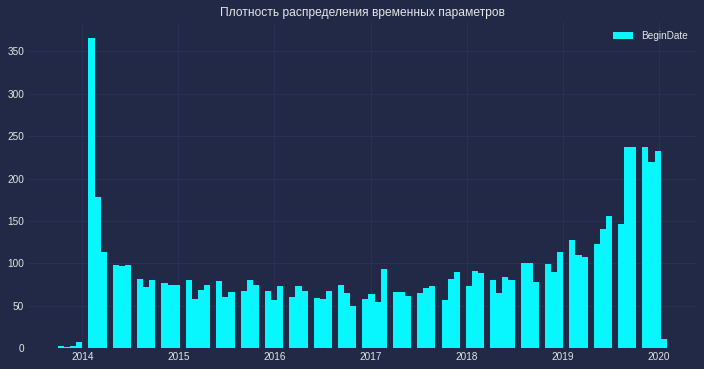

In [13]:
show_info_about(df_contract)

**Выводы** по датасету с информацией о договорах:
- Пропуски не обнаружены.
- Некоторые типы данных не соответствуют значениям. Столбцы `EndDate`, `TotalCharges` вместо `datetime` и `float` имеют строковый тип.
- В столбце `EndDate` присутствуют строковые значения 'No', при обработу нужно будет добавить параметр 'errors'.
- Дубликаты не установлены.
- Все id (`customerID`) уникальны.
- Выбросы по датам начала действия договора (`BeginDate`) не обнаружены.
- Следует заменить названия столбцов и сами данные на змеиный стиль.
- Заметим, что значения в стоблцах `BeginDate`, `EndDate` заполнены только первым числом месяца, что скорее всего связано с тем, что отчетной датой для обновления сведений является именно первое число соответствующего месяца. Проверим на этапе преобработки по всем значениям столбцов.

In [14]:
show_info_about(df_personal)

*** df_personal ***


,customerID,gender,SeniorCitizen,Partner,Dependents
2767,3572-UOLYZ,Female,0,No,Yes
537,5844-QVTAT,Female,0,Yes,Yes
2046,2538-OIMXF,Female,0,No,Yes
1067,7030-NJVDP,Male,0,Yes,No
3717,0655-YDGFJ,Male,0,No,No


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7043 entries, 0 to 7042

Data columns (total 5 columns):

 #   Column         Non-Null Count  Dtype 

---  ------         --------------  ----- 

 0   customerID     7043 non-null   object

 1   gender         7043 non-null   object

 2   SeniorCitizen  7043 non-null   int64 

 3   Partner        7043 non-null   object

 4   Dependents     7043 non-null   object

dtypes: int64(1), object(4)

memory usage: 275.2+ KB


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


Явные дубликаты отсутствуют



Уникальные значения категориальных признаков:

customerID - ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'

 '3186-AJIEK']

gender - ['Female' 'Male']

Partner - ['Yes' 'No']

Dependents - ['No' 'Yes']


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,7233-IOQNP,Male,No,No
freq,1,3555,3641,4933


**Выводы** по датасету с персональными данными клиентов:
- Пропуски не обнаружены.
- Типы данных соответствуют значениям.
- Дубликаты не установлены.
- Все id (`customerID`) уникальны.
- Следует заменить названия столбцов и сами данные на змеиный стиль.

In [15]:
show_info_about(df_internet)

*** df_internet ***


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2886,5312-UXESG,Fiber optic,No,No,Yes,No,Yes,Yes
4819,6328-ZPBGN,Fiber optic,No,No,No,No,Yes,Yes
5014,1422-DGUBX,Fiber optic,No,No,No,Yes,No,No
1415,5377-NDTOU,DSL,Yes,Yes,Yes,Yes,Yes,Yes
1644,2955-BJZHG,Fiber optic,No,No,No,No,Yes,No


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5517 entries, 0 to 5516

Data columns (total 8 columns):

 #   Column            Non-Null Count  Dtype 

---  ------            --------------  ----- 

 0   customerID        5517 non-null   object

 1   InternetService   5517 non-null   object

 2   OnlineSecurity    5517 non-null   object

 3   OnlineBackup      5517 non-null   object

 4   DeviceProtection  5517 non-null   object

 5   TechSupport       5517 non-null   object

 6   StreamingTV       5517 non-null   object

 7   StreamingMovies   5517 non-null   object

dtypes: object(8)

memory usage: 344.9+ KB


,count,unique,top,freq
customerID,5517,5517,1131-SUEKT,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


Явные дубликаты отсутствуют



Уникальные значения категориальных признаков:

customerID - ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'

 '3186-AJIEK']

InternetService - ['DSL' 'Fiber optic']

OnlineSecurity - ['No' 'Yes']

OnlineBackup - ['Yes' 'No']

DeviceProtection - ['No' 'Yes']

TechSupport - ['No' 'Yes']

StreamingTV - ['No' 'Yes']

StreamingMovies - ['No' 'Yes']


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,1131-SUEKT,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


**Выводы** по датасету с информацией об интернет-услугах:
- Пропуски не обнаружены.
- Типы данных соответствуют значениям.
- Дубликаты не установлены.
- Все id (`customerID`) уникальны.
- Следует заменить названия столбцов и сами данные на змеиный стиль.

In [16]:
show_info_about(df_phone)

*** df_phone ***


,customerID,MultipleLines
4492,4973-MGTON,No
2244,7140-ADSMJ,No
4315,0637-KVDLV,Yes
4513,3097-IDVPU,Yes
2132,4238-JSSWH,Yes


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6361 entries, 0 to 6360

Data columns (total 2 columns):

 #   Column         Non-Null Count  Dtype 

---  ------         --------------  ----- 

 0   customerID     6361 non-null   object

 1   MultipleLines  6361 non-null   object

dtypes: object(2)

memory usage: 99.5+ KB


,count,unique,top,freq
customerID,6361,6361,0799-DDIHE,1
MultipleLines,6361,2,No,3390


Явные дубликаты отсутствуют



Уникальные значения категориальных признаков:

customerID - ['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'

 '3186-AJIEK']

MultipleLines - ['No' 'Yes']


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,0799-DDIHE,No
freq,1,3390


**Выводы** по датасету с информацией об услугах телефонии:
- Пропуски не обнаружены.
- Типы данных соответствуют значениям.
- Дубликаты не установлены.
- Все id (`customerID`) уникальны.
- Следует заменить названия столбцов и сами данные на змеиный стиль.

### Предобработка данных

In [17]:
# Во всех датасетах приведем названия столбцов и значения качественных признаков к змеиному виду, кроме значений столбцов 
# с ID, пусть они и не чувствительны к регистру, это может иметь значение для объединения с какими-то иными таблицами.

for df in df_list:
    df.columns = df.columns.to_series().apply(to_snake_case)
    for col in df.drop(['customer_id'], axis=1).select_dtypes(include='object').columns.tolist():
        df[col] = df[col].apply(to_snake_case)

In [18]:
# При преобразовании типа данных воспользуемся параметром 'errors', который превратит все значения, 
# которые не удалось преобразовать в даты, в NaT.

df_contract['end_date'] = pd.to_datetime(df_contract['end_date'], errors='coerce')

In [19]:
df_contract[df_contract['end_date'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,NaT,month-to-month,yes,electronic_check,29.85,31.04
1,5575-GNVDE,2017-04-01,NaT,one_year,no,mailed_check,56.95,2071.84
2,3668-QPYBK,2019-10-01,NaT,month-to-month,yes,mailed_check,53.85,226.17
3,7795-CFOCW,2016-05-01,NaT,one_year,no,bank_transfer_(automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,NaT,month-to-month,yes,electronic_check,70.70,353.5
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,one_year,yes,mailed_check,84.80,2035.2
7039,2234-XADUH,2014-02-01,NaT,one_year,yes,credit_card_(automatic),103.20,7430.4
7040,4801-JZAZL,2019-03-01,NaT,month-to-month,yes,electronic_check,29.60,325.6
7041,8361-LTMKD,2019-07-01,NaT,month-to-month,yes,mailed_check,74.40,520.8


Отсутствие даты окончания действия договора означает использование услуг на отчетную дату (01.02.2020). Определим целевой признак на основе этого столбца.

In [20]:
df_contract['quit'] = 1
df_contract.loc[df_contract['end_date'].isna().values, 'quit'] = 0

In [21]:
# Посмотри на баланс классов по целевому признаку

df_contract['quit'].value_counts(normalize=True).to_frame()

,quit
0,0.843675
1,0.156325


В нашем проекте будет использоваться метрика ROC-AUC, которая не чувствительна к дисбалансу классов, в связи с чем прибегать к сэмплированию данных не будем

Пропуски `end_date` заполним отчетной датой 01.02.2020

In [22]:
df_contract['end_date'] = df_contract['end_date'].fillna(value=pd.to_datetime('2020-02-01'))

In [23]:
# Проверим, все ли значения столбцов с датами 'begin_date' и 'end_date' заполнены первыми числами соответствующих месяцев

print(df_contract['begin_date'].dt.day.unique())
print(df_contract['end_date'].dt.day.unique())

[1]

[1]


In [24]:
# Добавим дополнительный признак длительность действия договора на отчетную дату в днях (и отдельно в месяцах, который 
# впоследствии умножим на месячный тариф и сравним с общей оплатой)  

df_contract['contract_duration_days'] = df_contract['end_date'] - df_contract['begin_date']
df_contract['contract_duration_days'] = df_contract['contract_duration_days'].dt.days.astype(int)

df_contract['contract_duration_months'] = (df_contract['end_date'] - df_contract['begin_date']) / np.timedelta64(1, 'M')
df_contract['contract_duration_months'] = df_contract['contract_duration_months'].astype(int)

df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,quit,contract_duration_days,contract_duration_months
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic_check,29.85,31.04,0,31,1
1,5575-GNVDE,2017-04-01,2020-02-01,one_year,no,mailed_check,56.95,2071.84,0,1036,34
2,3668-QPYBK,2019-10-01,2020-02-01,month-to-month,yes,mailed_check,53.85,226.17,0,123,4
3,7795-CFOCW,2016-05-01,2020-02-01,one_year,no,bank_transfer_(automatic),42.30,1960.6,0,1371,45
4,9237-HQITU,2019-09-01,2020-02-01,month-to-month,yes,electronic_check,70.70,353.5,0,153,5


In [25]:
# При преобразовании типа данных воспользуемся параметром 'errors', который превратит все значения, 
# которые не удалось преобразовать в числа, в NaN.

df_contract['total_charges'] = pd.to_numeric(df_contract['total_charges'], errors='coerce')

In [26]:
df_contract[df_contract['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,quit,contract_duration_days,contract_duration_months
488,4472-LVYGI,2020-02-01,2020-02-01,two_year,yes,bank_transfer_(automatic),52.55,NaN,0,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,two_year,no,mailed_check,20.25,NaN,0,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,two_year,no,mailed_check,80.85,NaN,0,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,two_year,no,mailed_check,25.75,NaN,0,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,two_year,no,credit_card_(automatic),56.05,NaN,0,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,two_year,no,mailed_check,19.85,NaN,0,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,two_year,no,mailed_check,25.35,NaN,0,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,two_year,no,mailed_check,20.00,NaN,0,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,one_year,yes,mailed_check,19.70,NaN,0,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,two_year,no,mailed_check,73.35,NaN,0,0,0


Пропуски в столбце общих расходов абонента `total_charges` характерны для действующих пользователей, в основном с типом оплаты раз в 2 года, а также нулевой длительностью действия договора (дата начала действия договора совпадает с отчетной датой). Возможно, столбец заполняется по факту оплаты за услуги и для типов оплаты раз в год-два будет формироваться после истечения срока оплаты. Вероятным решением является заполнение пропусков нулями. Проверим на срезе клиентов с тем же типом оплаты

In [27]:
df_contract[(df_contract['type']=='two_year') & (df_contract['contract_duration_days'] < 150)]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,quit,contract_duration_days,contract_duration_months
269,7014-ZZXAW,2014-03-01,2014-06-01,two_year,yes,credit_card_(automatic),24.25,77.84,1,92,3
488,4472-LVYGI,2020-02-01,2020-02-01,two_year,yes,bank_transfer_(automatic),52.55,NaN,0,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,two_year,no,mailed_check,20.25,NaN,0,0,0
869,0323-XWWTN,2019-11-01,2020-02-01,two_year,yes,mailed_check,26.40,79.20,0,92,3
936,5709-LVOEQ,2020-02-01,2020-02-01,two_year,no,mailed_check,80.85,NaN,0,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,two_year,no,mailed_check,25.75,NaN,0,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,two_year,no,credit_card_(automatic),56.05,NaN,0,0,0
1839,9350-ZXYJC,2019-10-01,2020-02-01,two_year,yes,credit_card_(automatic),25.30,101.20,0,123,4
1900,0754-EEBDC,2019-10-01,2020-02-01,two_year,no,mailed_check,19.90,86.76,0,123,4
1997,0266-CLZKZ,2014-07-01,2014-09-01,two_year,yes,bank_transfer_(automatic),105.65,228.20,1,62,2


Таким образом, можем сделать вывод, что общие расходы абонентов обновляются каждое первое число месяца, в данном случае будет некорректно заполнять пропуски `total_charges` значениями `monthly_charges`, поэтому будем заполнять эти пропусками только нулями.

In [28]:
df_contract['total_charges'] = df_contract['total_charges'].fillna(0)

In [29]:
df_contract['begin_date'].describe()

count                    7043
unique                     77
top       2014-02-01 00:00:00
freq                      366
first     2013-10-01 00:00:00
last      2020-02-01 00:00:00
Name: begin_date, dtype: object

In [30]:
# Сделаем проверку на соответствие типов данных

for df in df_list:
    print('***', [x for x in globals() if globals()[x] is df][0], '***')
    for col in df.columns:
        print(col, ':', pd.api.types.infer_dtype(df[col]))
    print()

*** df_contract ***

customer_id : string

begin_date : datetime64

end_date : datetime64

type : string

paperless_billing : string

payment_method : string

monthly_charges : floating

total_charges : floating

quit : integer

contract_duration_days : integer

contract_duration_months : integer



*** df_personal ***

customer_id : string

gender : string

senior_citizen : integer

partner : string

dependents : string



*** df_internet ***

customer_id : string

internet_service : string

online_security : string

online_backup : string

device_protection : string

tech_support : string

streaming_tv : string

streaming_movies : string



*** df_phone ***

customer_id : string

multiple_lines : string




In [31]:
# Добавим признак смены тарифа, если общие расходы абонента не равна количеству месяцев, умноженных на месячный тариф

df_contract['changed_tariffs'] = df_contract['total_charges'] / df_contract['contract_duration_months'] - \
                                 df_contract['monthly_charges']
df_contract['changed_tariffs'] = df_contract['changed_tariffs'].apply(lambda x: 0 if x == 0 else 1)

In [32]:
df_contract['changed_tariffs'].value_counts().to_frame()

,changed_tariffs
1,4760
0,2283


Неожиданно интересное распределение, почти треть абонентов никогда не меняли тариф. Посмотрим дальнейшее поведение признака и его показатели на корреляционном анализе.

Признак `contract_duration_months` нам больше не понадобится, сразу его удалим. Также как и удалим признаки с датами (`begin_end`, `end_date`) как факторы времени.

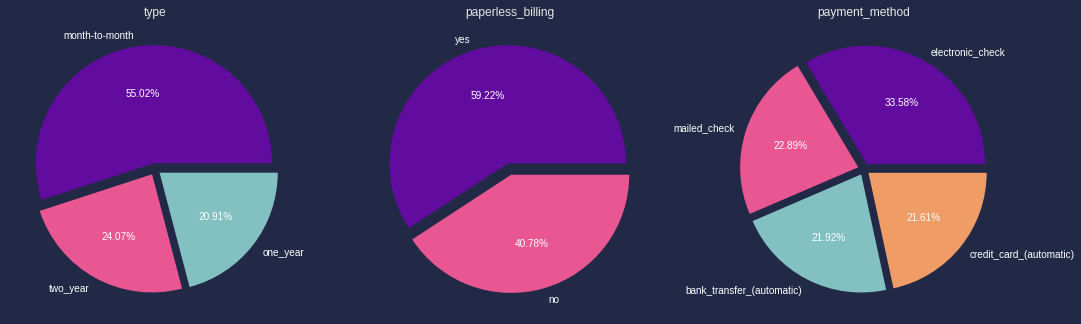

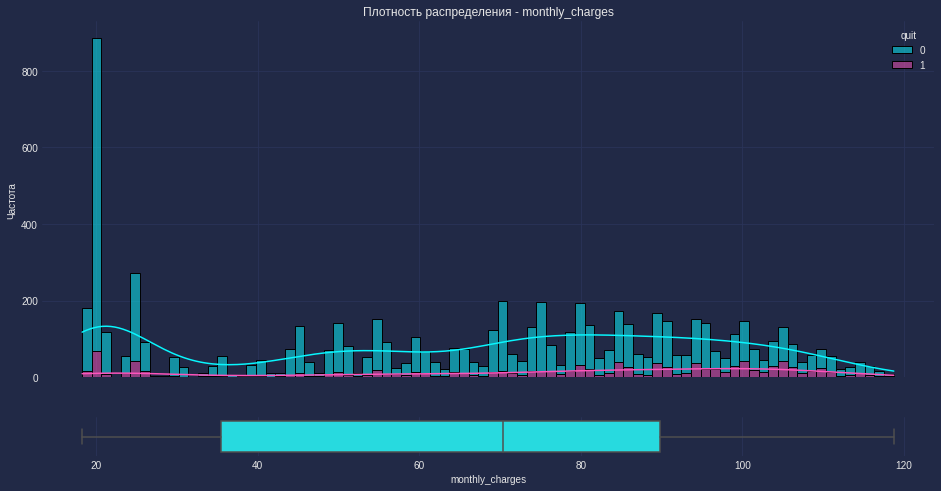

Распределение данных по тесту Шапиро-Уилка параметра 'monthly_charges' не является нормальным, p-value = 0.0


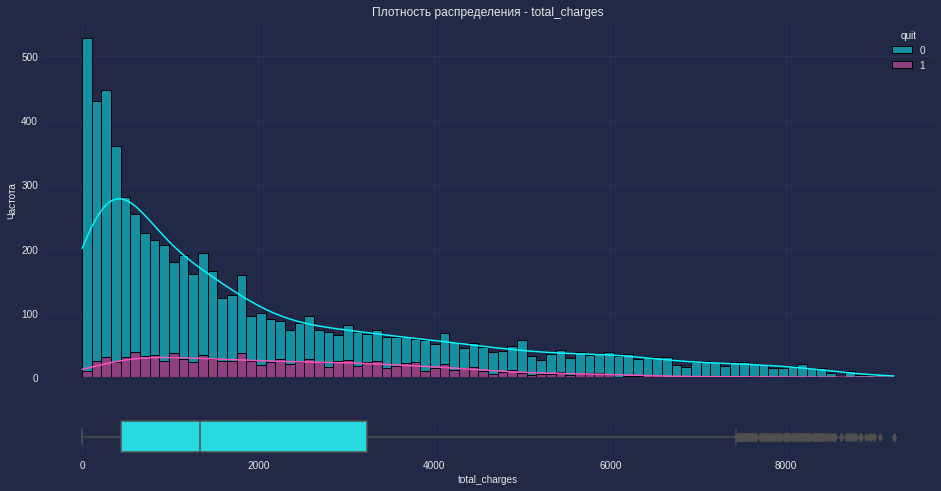

Распределение данных по тесту Шапиро-Уилка параметра 'total_charges' не является нормальным, p-value = 0.0


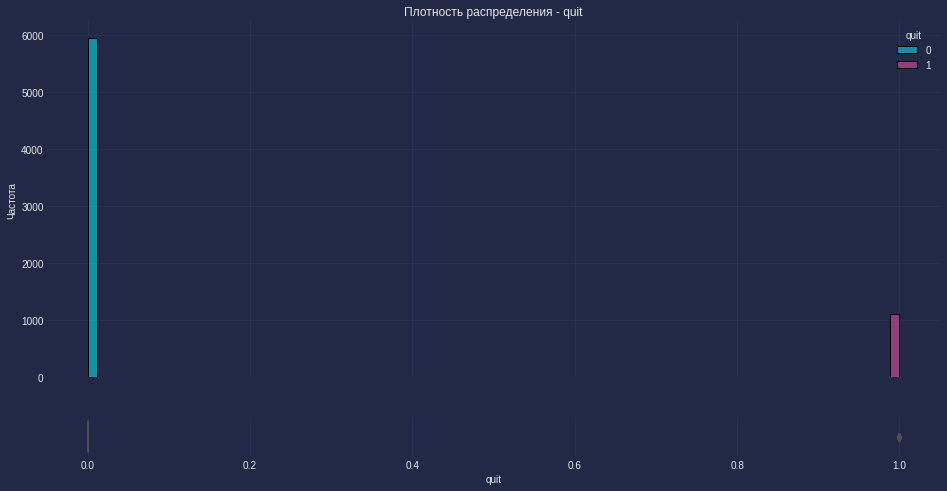

Распределение данных по тесту Шапиро-Уилка параметра 'quit' не является нормальным, p-value = 0.0


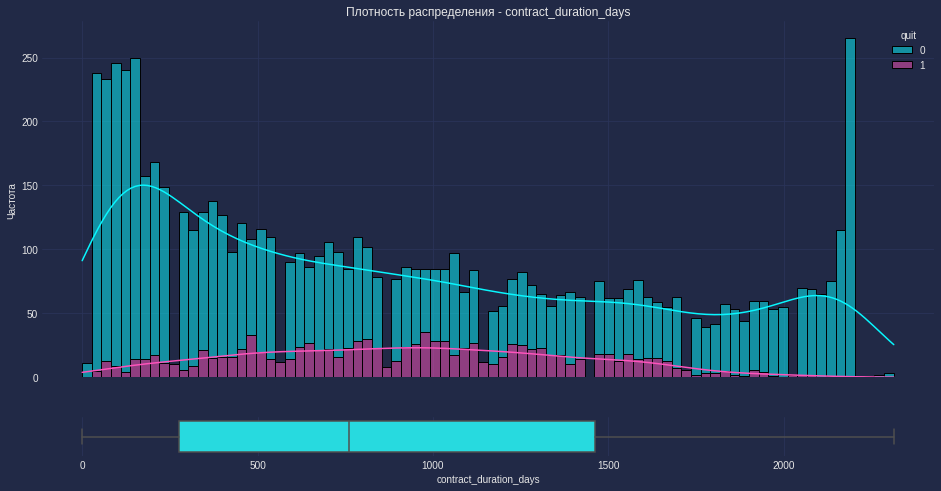

Распределение данных по тесту Шапиро-Уилка параметра 'contract_duration_days' не является нормальным, p-value = 0.0


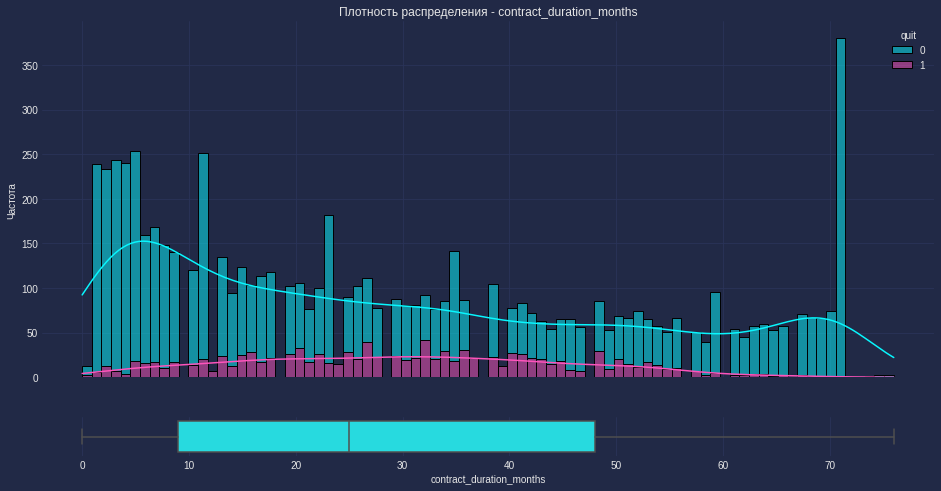

Распределение данных по тесту Шапиро-Уилка параметра 'contract_duration_months' не является нормальным, p-value = 0.0


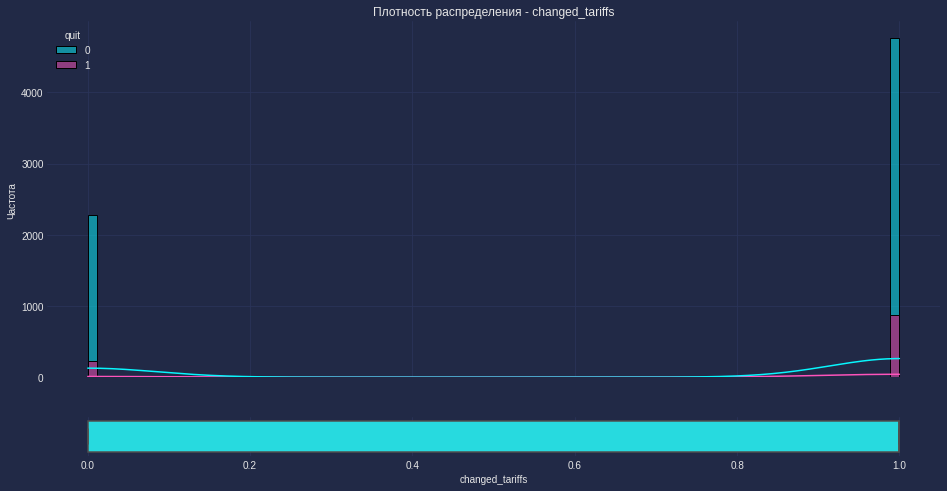

Распределение данных по тесту Шапиро-Уилка параметра 'changed_tariffs' не является нормальным, p-value = 0.0


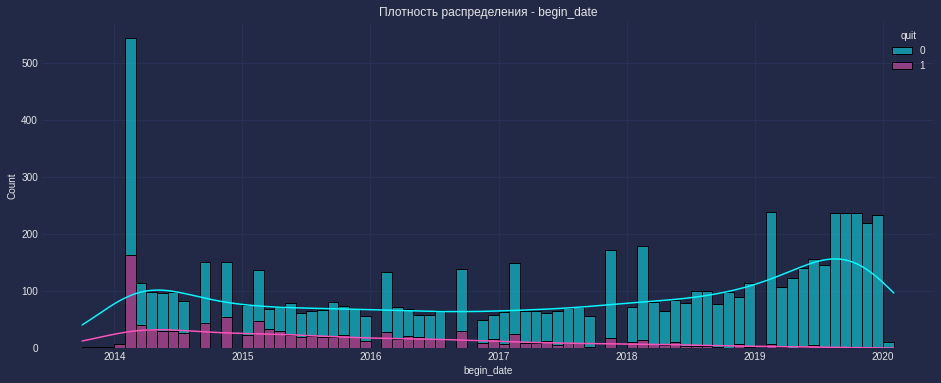

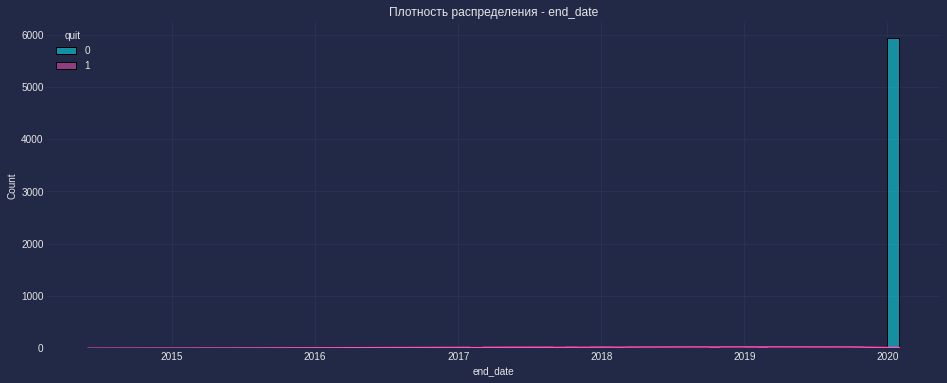

In [33]:
draw_graphs_and_shapiro(df_contract.drop(['customer_id'], axis=1), 'quit')

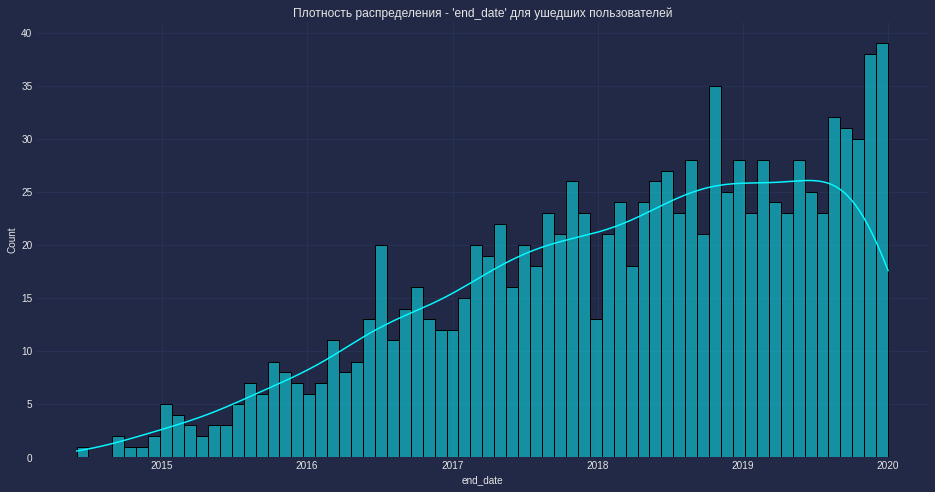

In [34]:
# Отдельно построим гистограмму для дат окончания контрактов ушедших пользователей 

plt.figure(figsize=(16,8))
sns.histplot(data=df_contract[df_contract['quit']==1], x='end_date', kde=True, legend=True, 
             bins=int((df_contract['end_date'].max() - df_contract['end_date'].min()) / np.timedelta64(1, 'M')))
plt.title(f"Плотность распределения - 'end_date' для ушедших пользователей")
plt.show()

### Выводы

- Представлены данные с 1 октября 2013 по 1 февраля 2020.
- Целевой признак был определен на основе пропусков в столбце с датой окончания действия договора EndDate. Имеется дисбаланс классов целевого признака (84 % оставшихся и 16 % ушедших абонентов).
- Отчетной датой для обновления сведений является именно первое число соответствующего месяца.
- 56% абонентов имеют ежемесячный тип оплаты.
- Почти 60% используют электронный расчетный лист.
- Наиболее частое значение ежемесячных расходов - 20 у.е. Медианное значение для всех абонентов - порядка 70 у.е.
- Медианное значение общих расходов - 1400 у.е.
- Высокая концентрация новых клиентов (до 4 месяцев).
- Абонентов, меняющих тарифы, почти в 2 раза больше.
- Наблюдается тенденция к увеличению оттока клиентов каждый год.

## Объединение данных

In [35]:
df = df_contract.merge(df_personal, on='customer_id', how='left')
df = df.merge(df_internet, on='customer_id', how='left')
df = df.merge(df_phone, on='customer_id', how='left')
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,quit,contract_duration_days,contract_duration_months,changed_tariffs,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic_check,29.85,31.04,0,31,1,1,female,0,yes,no,dsl,no,yes,no,no,no,no,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,one_year,no,mailed_check,56.95,2071.84,0,1036,34,1,male,0,no,no,dsl,yes,no,yes,no,no,no,no
2,3668-QPYBK,2019-10-01,2020-02-01,month-to-month,yes,mailed_check,53.85,226.17,0,123,4,1,male,0,no,no,dsl,yes,yes,no,no,no,no,no
3,7795-CFOCW,2016-05-01,2020-02-01,one_year,no,bank_transfer_(automatic),42.30,1960.60,0,1371,45,1,male,0,no,no,dsl,yes,no,yes,yes,no,no,NaN
4,9237-HQITU,2019-09-01,2020-02-01,month-to-month,yes,electronic_check,70.70,353.50,0,153,5,0,female,0,no,no,fiber_optic,no,no,no,no,no,no,no


## Исследовательский анализ и предобработка данных объединённого датафрейма

In [36]:
# Проверим на наличие дубликатов после объединения

df[df.duplicated()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,quit,contract_duration_days,contract_duration_months,changed_tariffs,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines


*** df ***


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,quit,contract_duration_days,contract_duration_months,changed_tariffs,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
1803,2773-MADBQ,2017-02-01,2020-02-01,two_year,yes,mailed_check,53.10,1911.60,0,1095,35,1,female,0,no,no,dsl,yes,yes,yes,yes,no,yes,NaN
343,9639-BUJXT,2014-11-01,2020-02-01,one_year,no,mailed_check,20.50,1291.50,0,1918,63,0,male,0,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
5841,7136-RVDTZ,2014-03-01,2016-10-01,one_year,yes,electronic_check,45.25,1402.75,1,945,31,0,male,1,no,no,dsl,no,no,no,no,yes,yes,NaN
720,4697-LUPSU,2019-12-01,2020-02-01,one_year,no,mailed_check,20.20,42.82,0,62,2,1,male,0,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
6218,8821-KVZKQ,2014-04-01,2020-02-01,one_year,yes,bank_transfer_(automatic),58.40,4496.80,0,2132,70,1,female,0,yes,yes,dsl,no,yes,yes,yes,yes,yes,NaN


<class 'pandas.core.frame.DataFrame'>

Int64Index: 7043 entries, 0 to 7042

Data columns (total 24 columns):

 #   Column                    Non-Null Count  Dtype         

---  ------                    --------------  -----         

 0   customer_id               7043 non-null   object        

 1   begin_date                7043 non-null   datetime64[ns]

 2   end_date                  7043 non-null   datetime64[ns]

 3   type                      7043 non-null   object        

 4   paperless_billing         7043 non-null   object        

 5   payment_method            7043 non-null   object        

 6   monthly_charges           7043 non-null   float64       

 7   total_charges             7043 non-null   float64       

 8   quit                      7043 non-null   int64         

 9   contract_duration_days    7043 non-null   int64         

 10  contract_duration_months  7043 non-null   int64         

 11  changed_tariffs           7043 non-null   int64         

 12  gen

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2115.312885,2112.742814,0.00,436.75,1343.35,3236.69,9221.38
quit,7043.0,0.156325,0.363189,0.00,0.00,0.00,0.00,1.00
contract_duration_days,7043.0,898.555729,683.130510,0.00,276.00,761.00,1461.00,2314.00
contract_duration_months,7043.0,29.326139,22.375522,0.00,9.00,25.00,48.00,76.00
changed_tariffs,7043.0,0.675848,0.468090,0.00,0.00,1.00,1.00,1.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00


Явные дубликаты отсутствуют



Уникальные значения категориальных признаков:

customer_id - ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'

 '3186-AJIEK']

type - ['month-to-month' 'one_year' 'two_year']

paperless_billing - ['yes' 'no']

payment_method - ['electronic_check' 'mailed_check' 'bank_transfer_(automatic)'

 'credit_card_(automatic)']

gender - ['female' 'male']

partner - ['yes' 'no']

dependents - ['no' 'yes']

internet_service - ['dsl' 'fiber_optic' nan]

online_security - ['no' 'yes' nan]

online_backup - ['yes' 'no' nan]

device_protection - ['no' 'yes' nan]

tech_support - ['no' 'yes' nan]

streaming_tv - ['no' 'yes' nan]

streaming_movies - ['no' 'yes' nan]

multiple_lines - [nan 'no' 'yes']


,customer_id,type,paperless_billing,payment_method,gender,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
count,7043,7043,7043,7043,7043,7043,7043,5517,5517,5517,5517,5517,5517,5517,6361
unique,7043,3,2,4,2,2,2,2,2,2,2,2,2,2,2
top,7233-IOQNP,month-to-month,yes,electronic_check,male,no,no,fiber_optic,no,no,no,no,no,no,no
freq,1,3875,4171,2365,3555,3641,4933,3096,3498,3088,3095,3473,2810,2785,3390


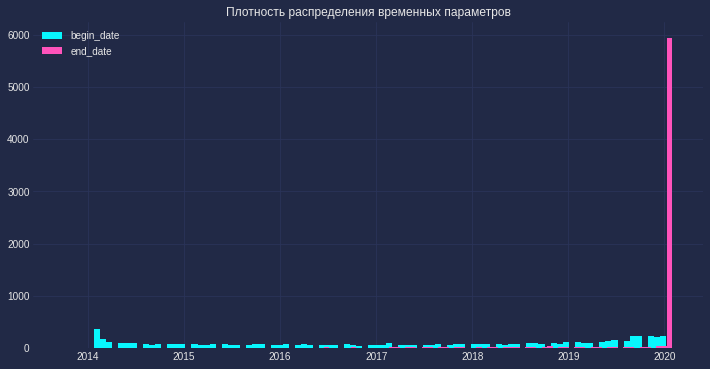

In [37]:
show_info_about(df)

После объединения датасетов видим, что ID абонентов указаны верно, объединение по признаку произошло корректно. Дубликаты отсутствуют. Заметим, что есть абоненты, пользующиеся как интернет-услугами, так и телефонией одновременно, либо чем-то одним.

### Добавление новых признаков

In [38]:
# Новый критерий - была ли смены тарифа, если общие расходы абонента не равна количеству месяцев, умноженных на месячный тариф

df['changed_tariffs'] = df['total_charges'] / df['contract_duration_months'] - \
                        df['monthly_charges']
df['changed_tariffs'] = df['changed_tariffs'].apply(lambda x: 0 if x == 0 else 1)

In [39]:
df['changed_tariffs'].value_counts().to_frame()

,changed_tariffs
1,4760
0,2283


Неожиданно интересное распределение, почти треть абонентов никогда не меняли тариф. Посмотрим дальнейшее поведение признака и его показатели на корреляционном анализе.

In [40]:
# новый критерий - использование услуг телефонии: нет / да, 1 линия / да, несколько линий

df['phone_service'] = 1
df.loc[df['multiple_lines'].isna().values, 'phone_service'] = 0
df.loc[df['multiple_lines']=='yes', 'phone_service'] = 2

In [41]:
# Новый критерий - количество подключенных интернет-услуг

df['internet_services_total'] = df[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                                    'streaming_movies']].applymap(lambda x: 1 if x == 'yes' else 0).sum(axis=1)

In [42]:
# Новый критерий - использование услуг интернета: да / нет
# Для более корректного описания столбцов переименуем действующий столбец

df = df.rename(columns={'internet_service': 'internet_type'})

In [43]:
df['internet_service'] = 1
df.loc[df['internet_type'].isna().values, 'internet_service'] = 0

Согласно условию задачи, в файлах internet.csv и phone.csv информация о некоторых клиентах может отсутствовать — это значит, что клиент соответствующими услугами не пользуется, таким образом, заменим пропуски этих столбцов на 'no'. Но до заполнения пропусков добавим новый критерий об использовании услуг телефонии

In [44]:
for i in ['internet_type', 'multiple_lines']:
    df[i] = df[i].fillna('no')

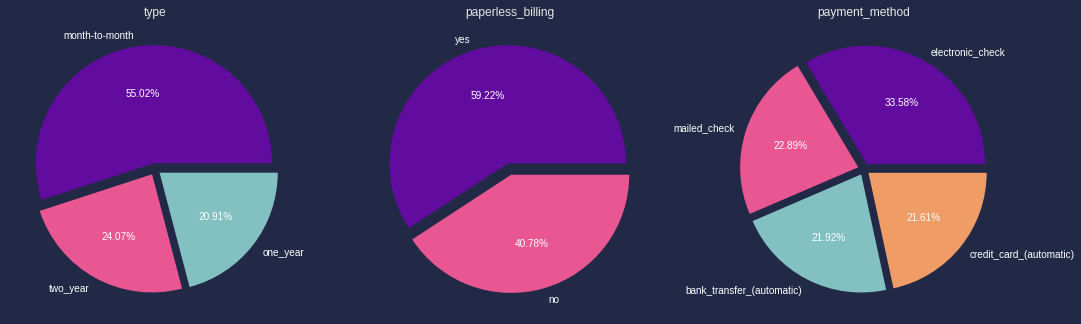

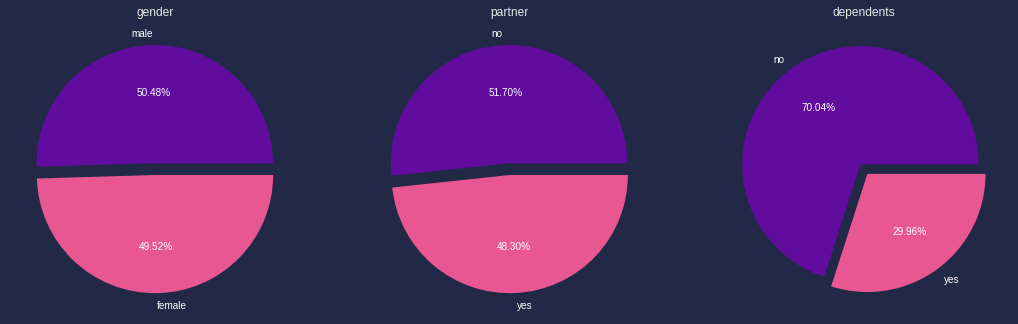

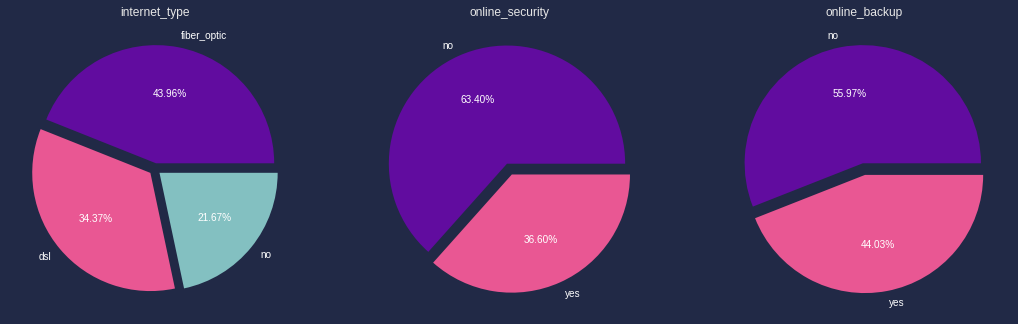

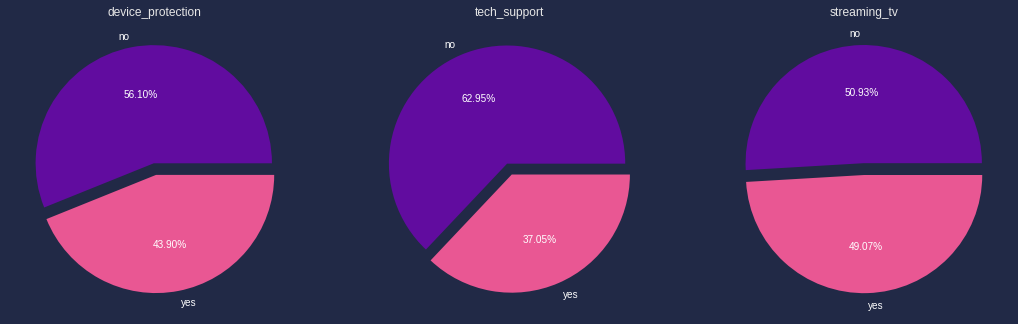

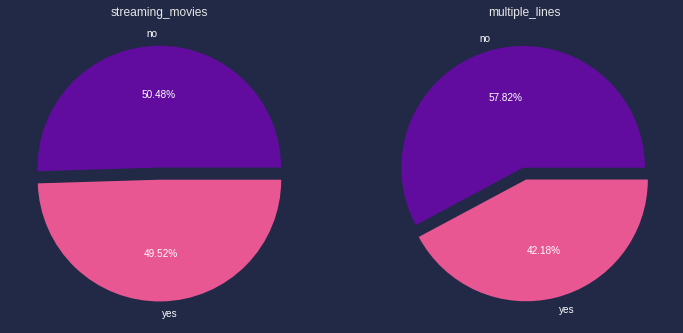

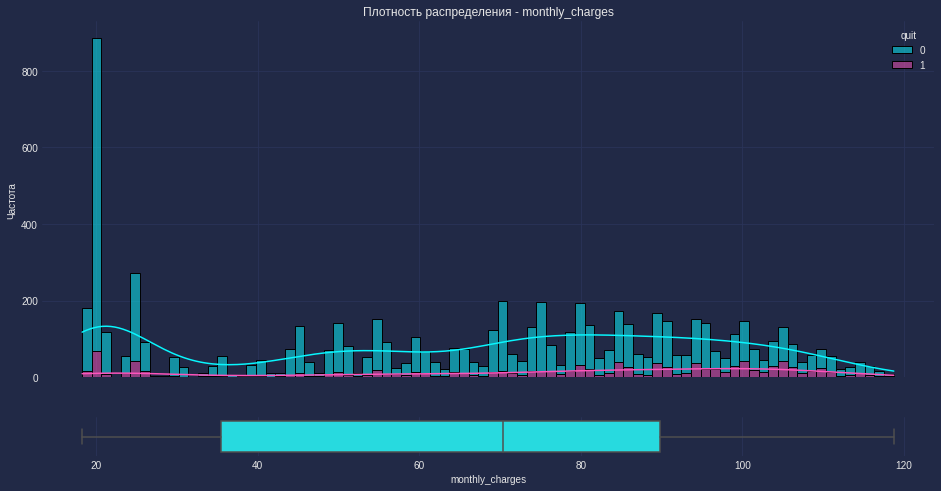

Распределение данных по тесту Шапиро-Уилка параметра 'monthly_charges' не является нормальным, p-value = 0.0


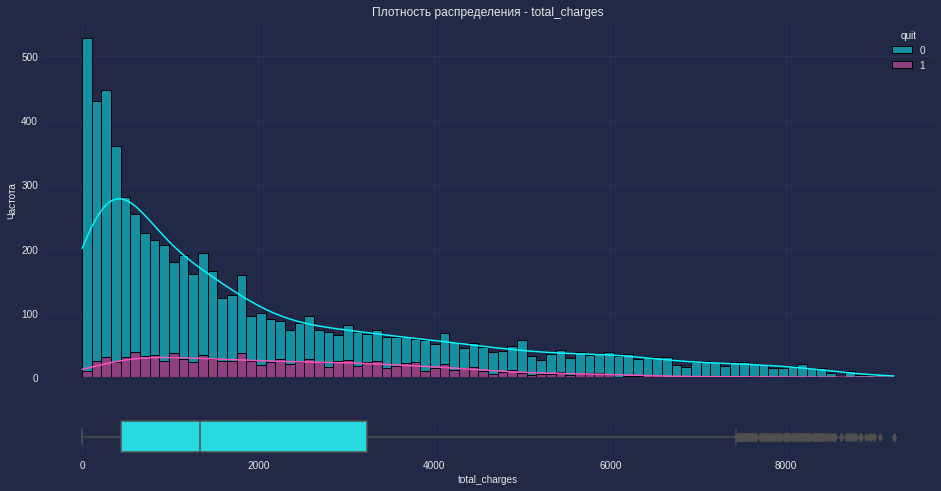

Распределение данных по тесту Шапиро-Уилка параметра 'total_charges' не является нормальным, p-value = 0.0


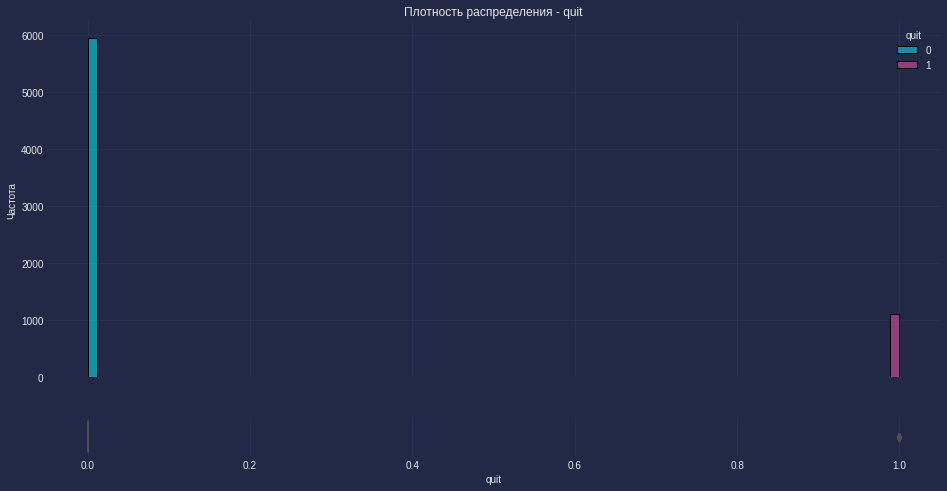

Распределение данных по тесту Шапиро-Уилка параметра 'quit' не является нормальным, p-value = 0.0


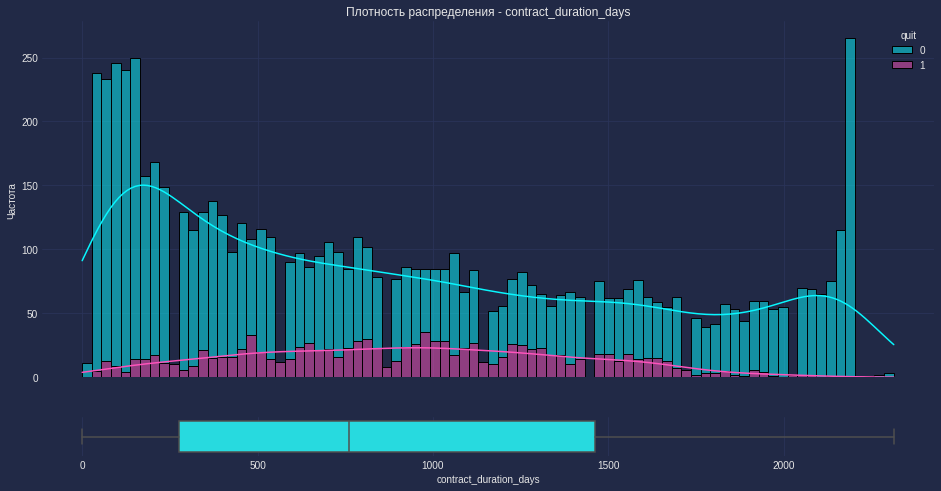

Распределение данных по тесту Шапиро-Уилка параметра 'contract_duration_days' не является нормальным, p-value = 0.0


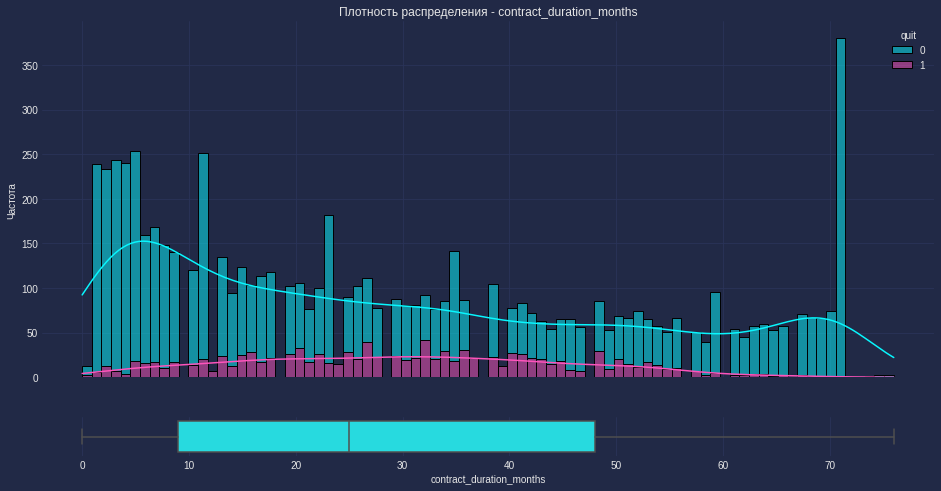

Распределение данных по тесту Шапиро-Уилка параметра 'contract_duration_months' не является нормальным, p-value = 0.0


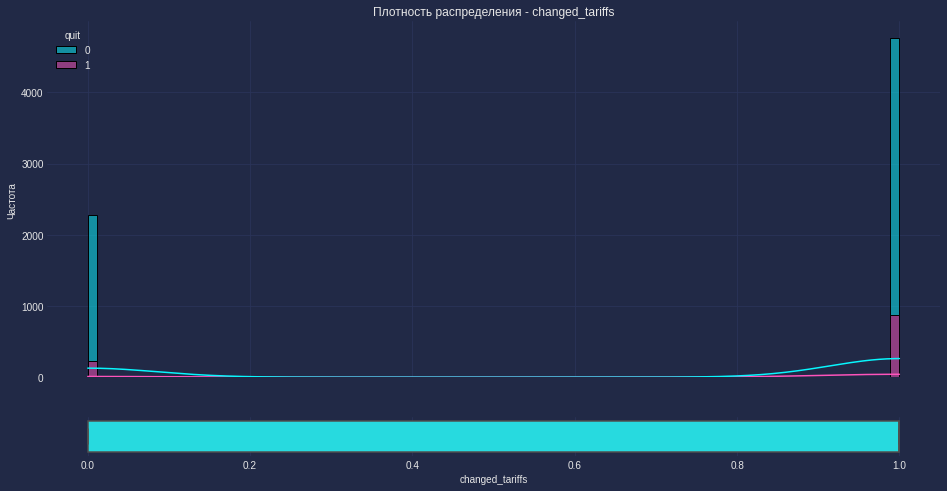

Распределение данных по тесту Шапиро-Уилка параметра 'changed_tariffs' не является нормальным, p-value = 0.0


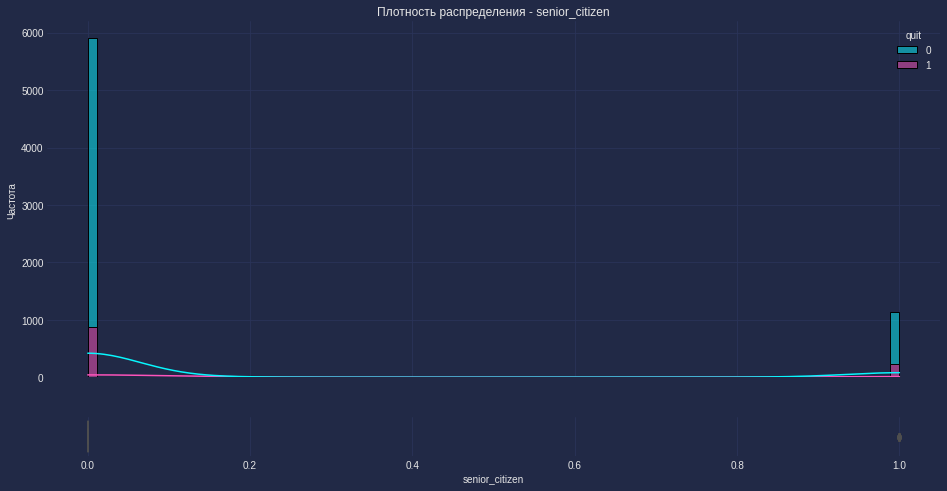

Распределение данных по тесту Шапиро-Уилка параметра 'senior_citizen' не является нормальным, p-value = 0.0


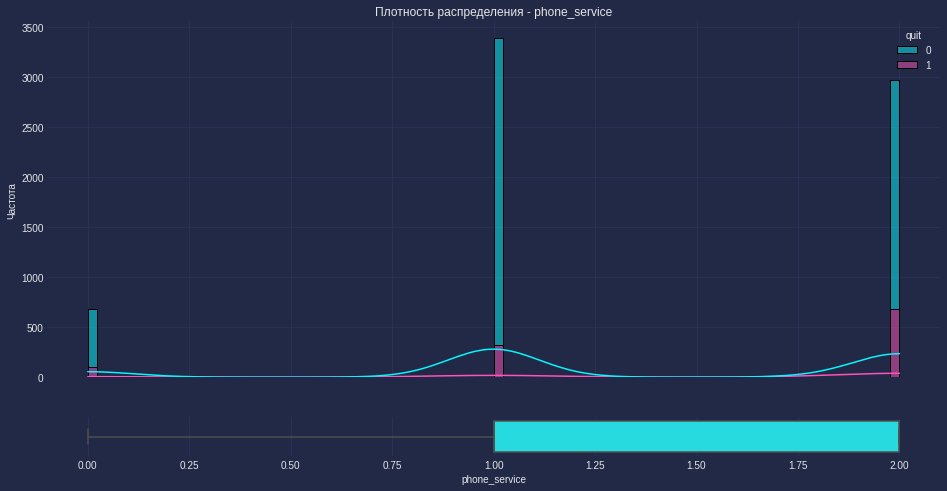

Распределение данных по тесту Шапиро-Уилка параметра 'phone_service' не является нормальным, p-value = 0.0


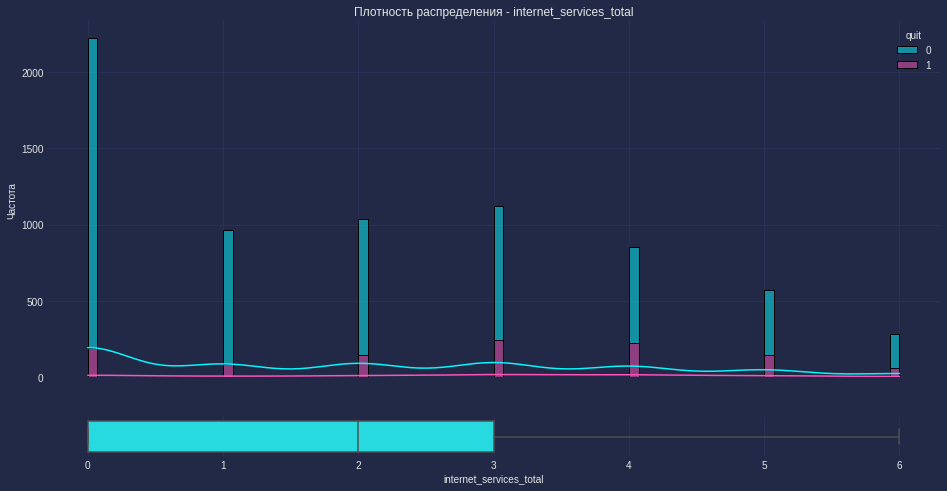

Распределение данных по тесту Шапиро-Уилка параметра 'internet_services_total' не является нормальным, p-value = 0.0


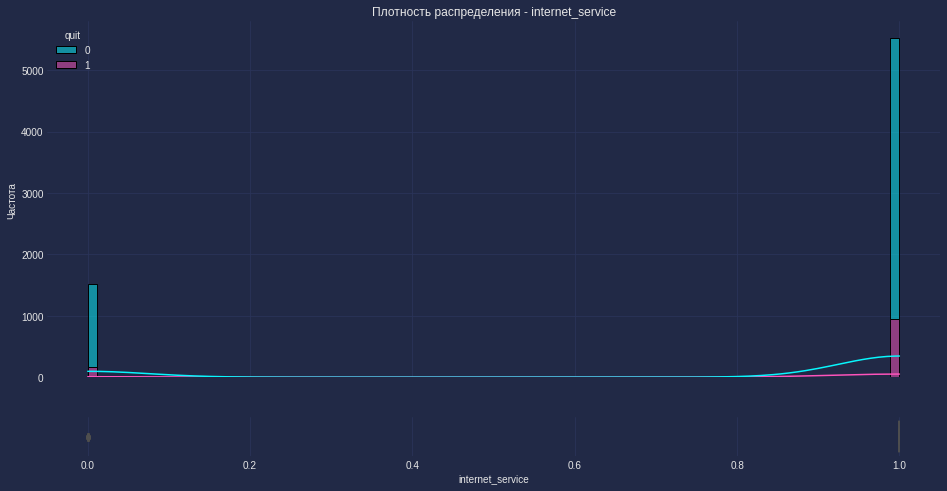

Распределение данных по тесту Шапиро-Уилка параметра 'internet_service' не является нормальным, p-value = 0.0


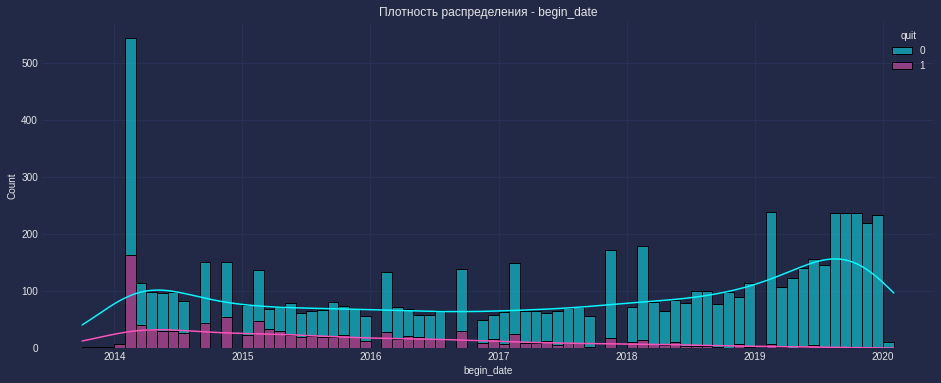

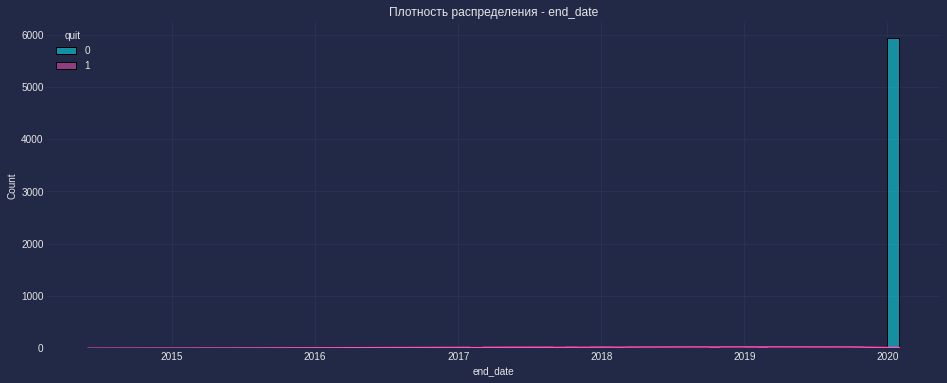

In [45]:
draw_graphs_and_shapiro(df.drop(['customer_id'],axis=1), 'quit')

### Корреляционный анализ

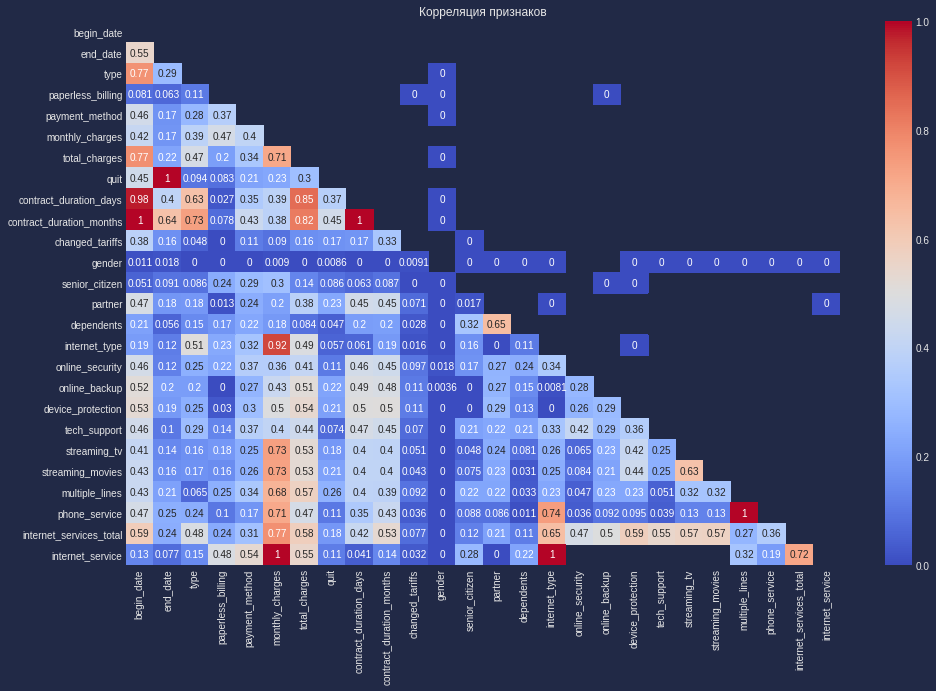

CPU times: user 6.33 s, sys: 304 ms, total: 6.63 s

Wall time: 6.97 s


In [46]:
%%time
interval_cols = ['monthly_charges', 'total_charges', 'contract_duration_days', 'internet_services_total']

matrix = np.triu(df.drop(['customer_id'], axis=1).phik_matrix(interval_cols = interval_cols));
plt.figure(figsize = (16,10))
sns.heatmap(df.drop(['customer_id'], axis=1).phik_matrix(interval_cols = interval_cols), 
            annot=True, cmap='coolwarm', mask=matrix);
plt.title('Корреляция признаков')
plt.show()

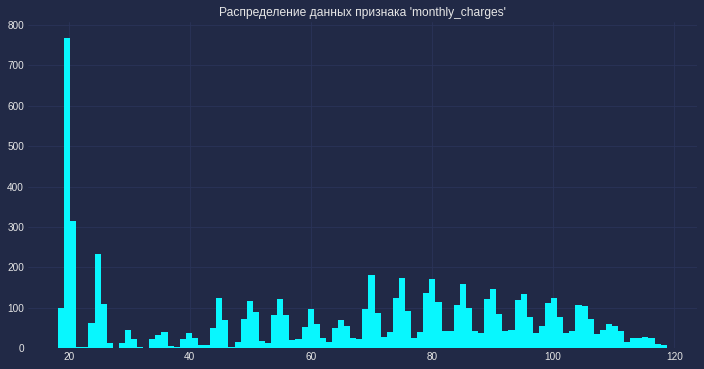

Распределение данных признака 'monthly_charges' не является нормальным, p-value = 0.0


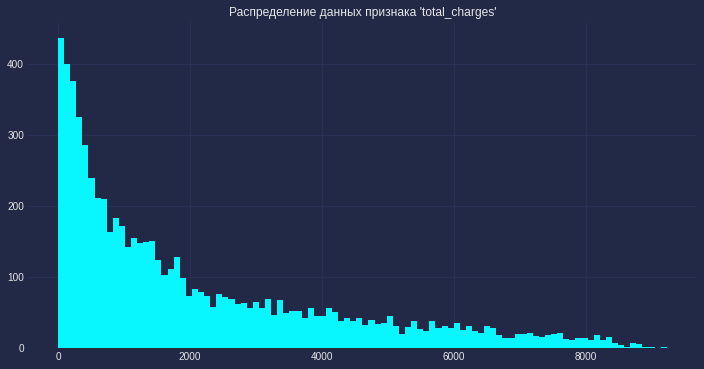

Распределение данных признака 'total_charges' не является нормальным, p-value = 0.0


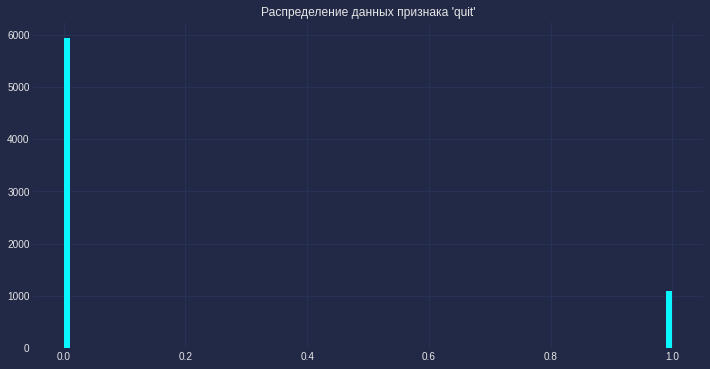

Распределение данных признака 'quit' не является нормальным, p-value = 0.0


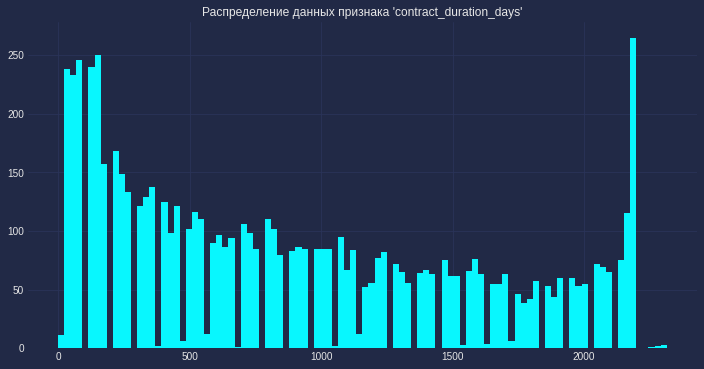

Распределение данных признака 'contract_duration_days' не является нормальным, p-value = 0.0


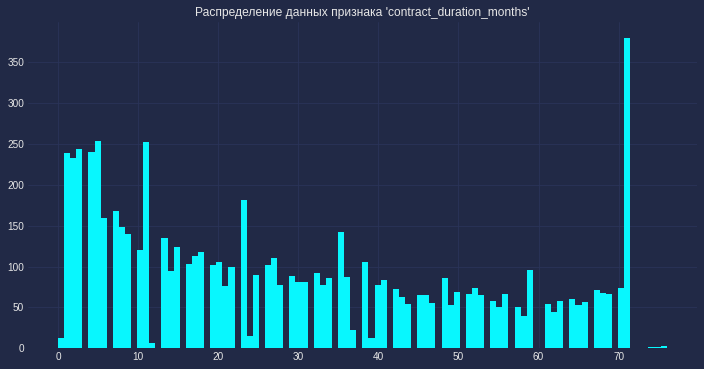

Распределение данных признака 'contract_duration_months' не является нормальным, p-value = 0.0


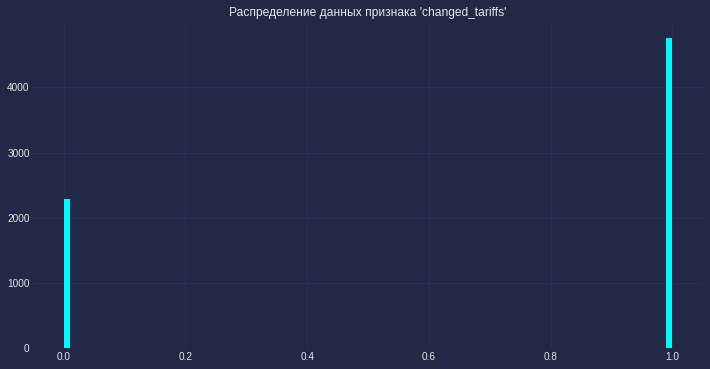

Распределение данных признака 'changed_tariffs' не является нормальным, p-value = 0.0


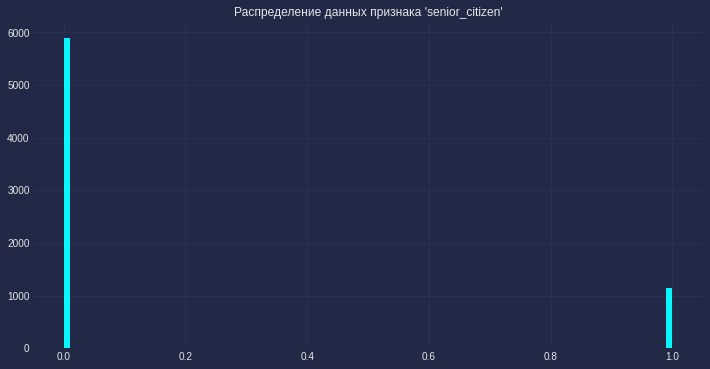

Распределение данных признака 'senior_citizen' не является нормальным, p-value = 0.0


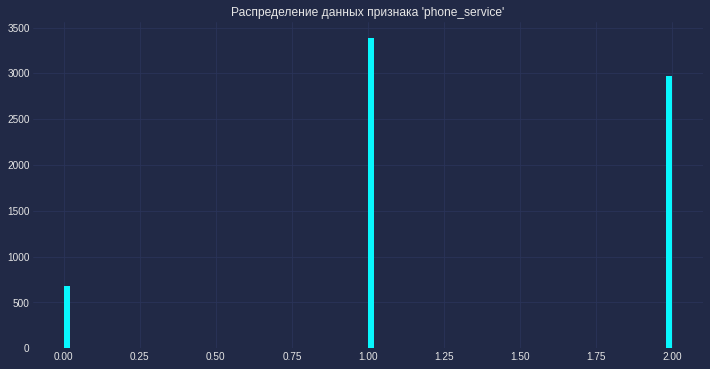

Распределение данных признака 'phone_service' не является нормальным, p-value = 0.0


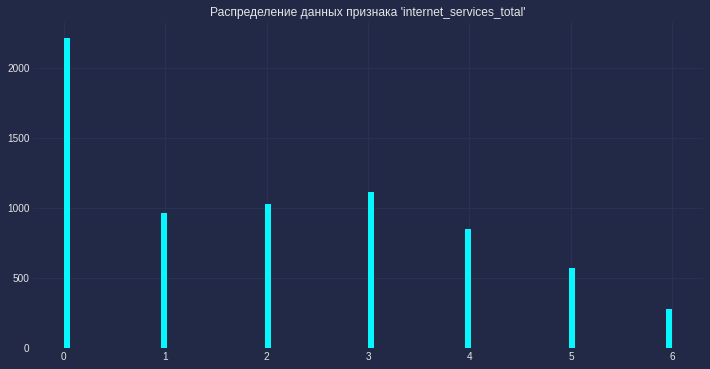

Распределение данных признака 'internet_services_total' не является нормальным, p-value = 0.0


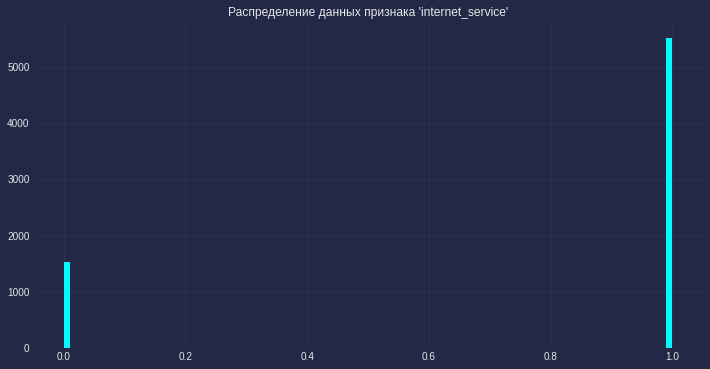

Распределение данных признака 'internet_service' не является нормальным, p-value = 0.0


In [47]:
# Используем тест Шапиро-Уилка для определения того, соответствуют ли выборки нормальному распределению.

num_col_names = df.select_dtypes(exclude=['object', 'datetime']).columns.tolist()
for i in num_col_names:
    stat, pvalue = shapiro(df[i])
    df[i].hist(bins=100, figsize=(12, 6));
    plt.title(f"Распределение данных признака '{i}'")
    plt.show()
    if pvalue > 0.05:
        print(f"Распределение данных признака '{i}' является нормальным, p-value =", pvalue)
    else:
        print(f"Распределение данных признака '{i}' не является нормальным, p-value =", pvalue)

Данные распределены ненормально. Таким образом, корреляция Пирсона не выглядит оптимальным вариантом, в связи с чем используем коэффициенты коррелляции Спирмана.

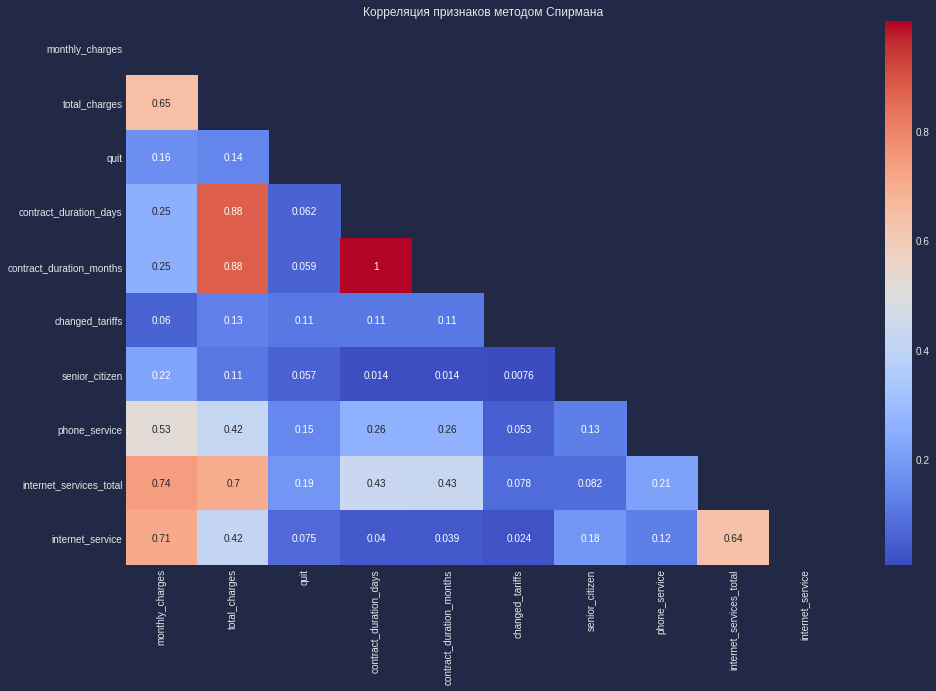

In [48]:
# Используем коэффициенты корреляции Спирмана.

matrix = np.triu(df[num_col_names].corr(method='spearman'));
plt.figure(figsize = (16,10))
sns.heatmap(df[num_col_names].corr(method='spearman'), annot=True, 
            cmap='coolwarm', mask=matrix);
plt.title('Корреляция признаков методом Спирмана')
plt.show()

CPU times: user 22.9 s, sys: 112 ms, total: 23 s

Wall time: 23 s


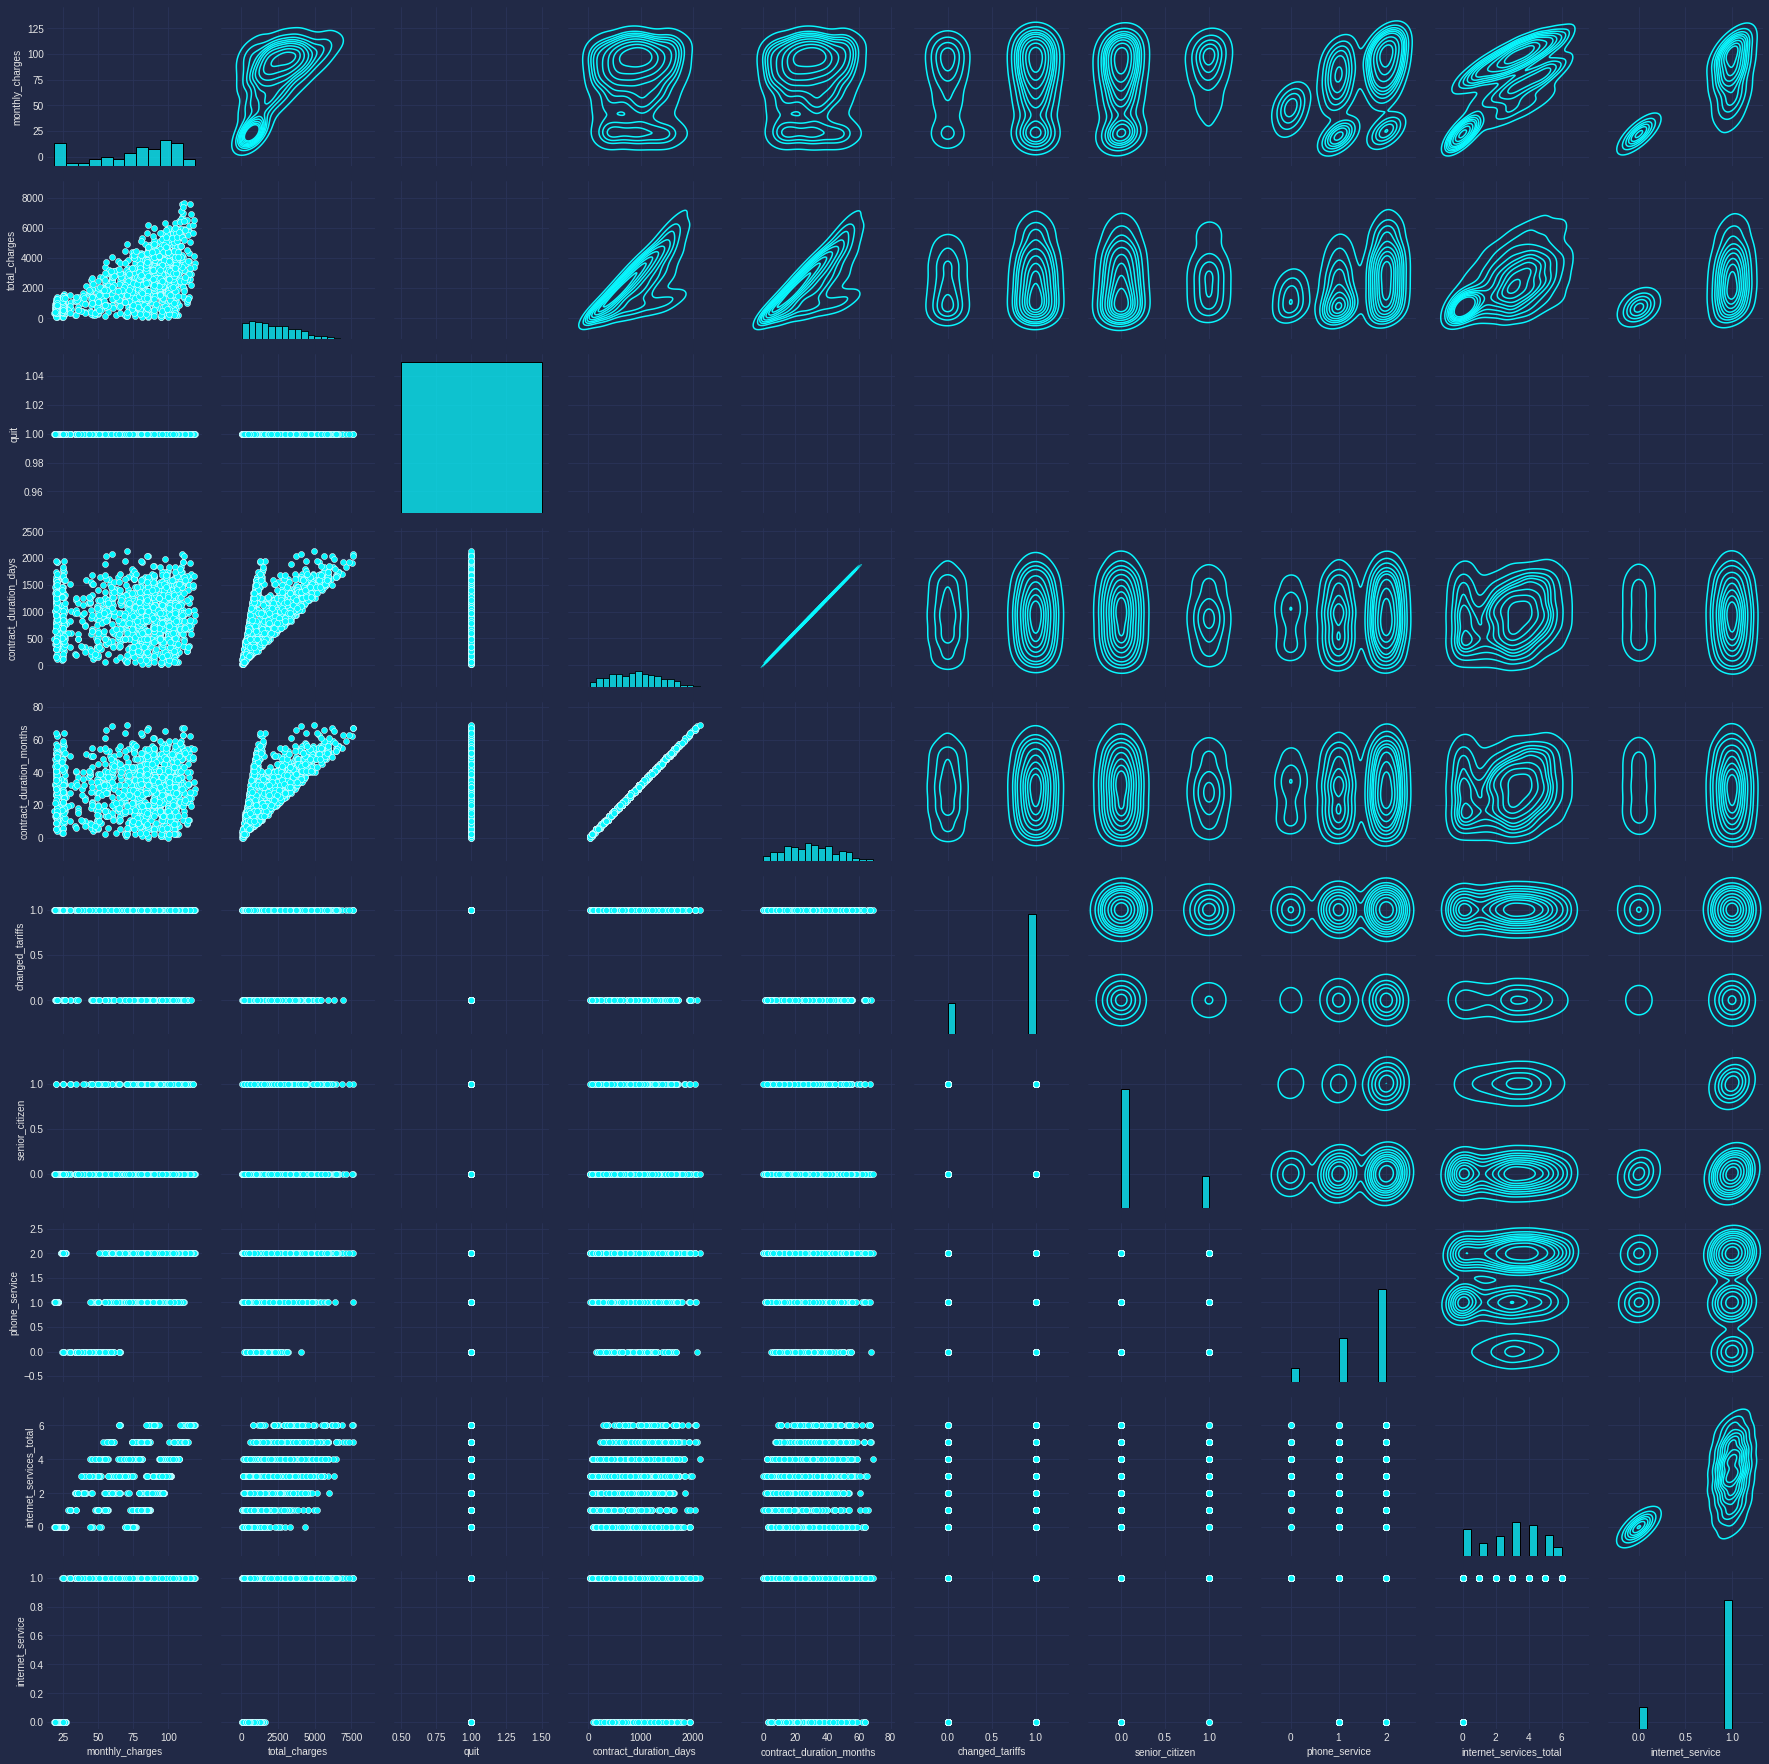

In [49]:
%%time
g = sns.PairGrid(df[df['quit']==1]);
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

Построил диаграммы рассеяния всех признаков для ушедших абонентов.

По диаграммам рассеяния из нетривиального можем сделать вывод, что у признака `total_charges` высокая линейная зависимость со сроком действия контракта.

С увеличением количества используемых интрнет-услуг логично увеличивается и ежемесячная оплата. Рассмотри отдельно диаграмму.

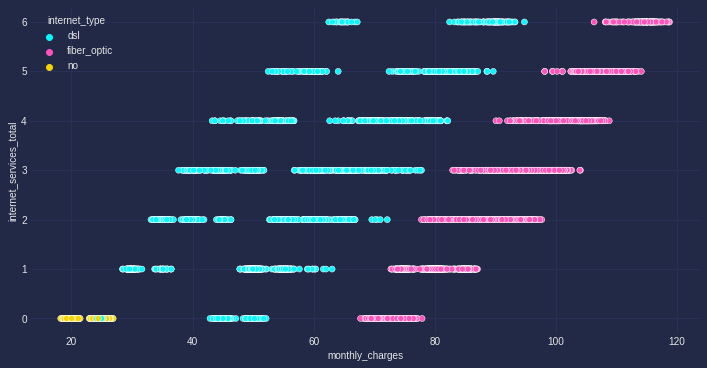

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='monthly_charges', 
    y='internet_services_total', 
    data=df,
    hue='internet_type')
plt.show()

Оптоволоконное интернет соединение самое дорогое. Даже при отсутствии дополнительно подключенных интернет-услуг минимальный расход за месяц составит 65 у.е. Высокая цена за оптоволоконное соединение может являться одной из причин для оттока.

### Портрет ушедшего пользователя

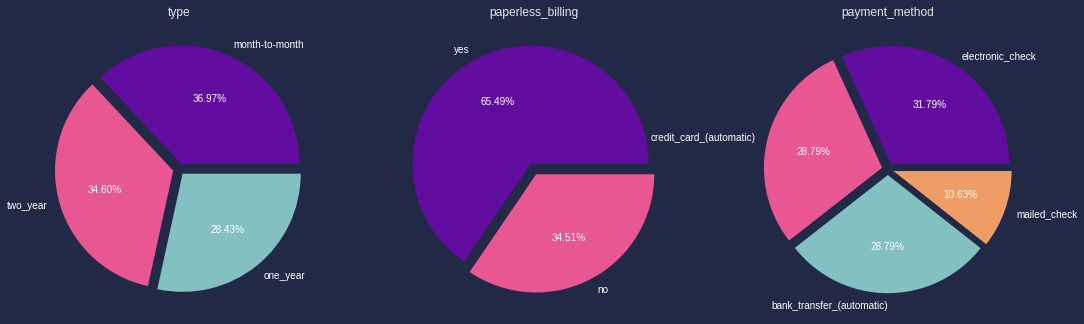

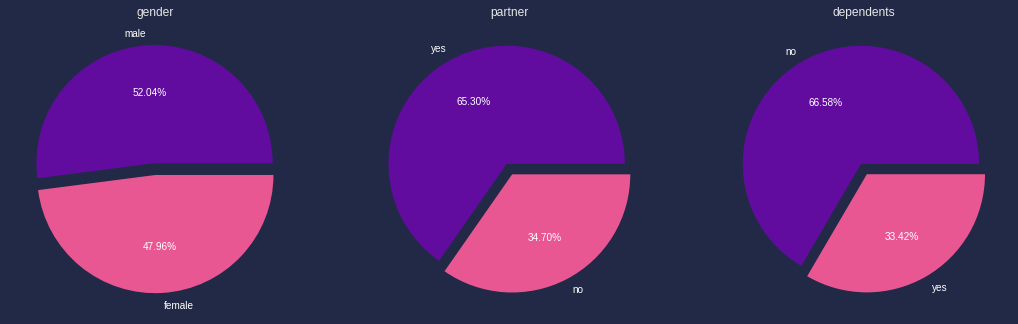

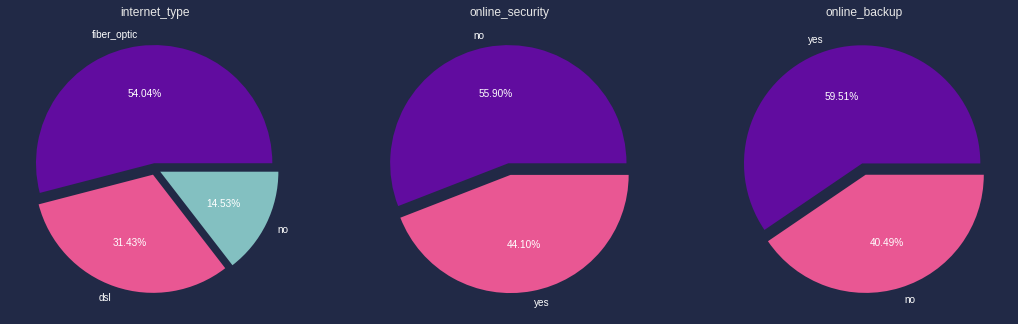

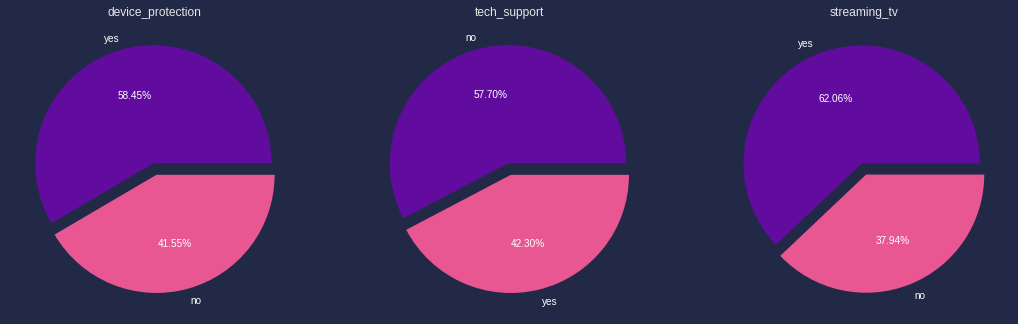

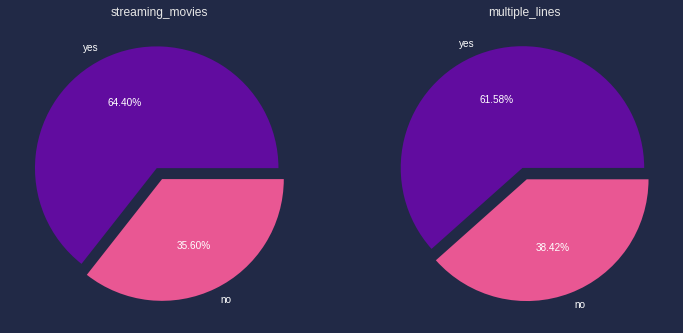

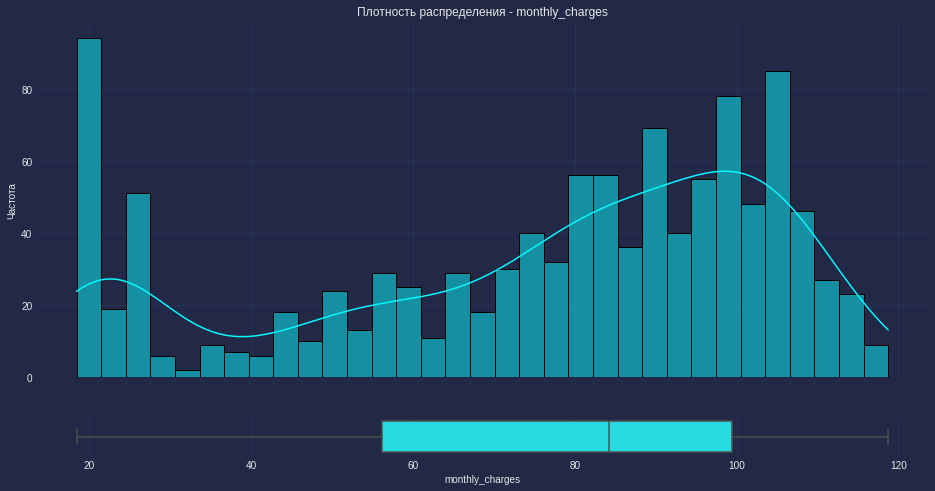

Распределение данных по тесту Шапиро-Уилка параметра 'monthly_charges' не является нормальным, p-value = 1.7239521244411066e-26


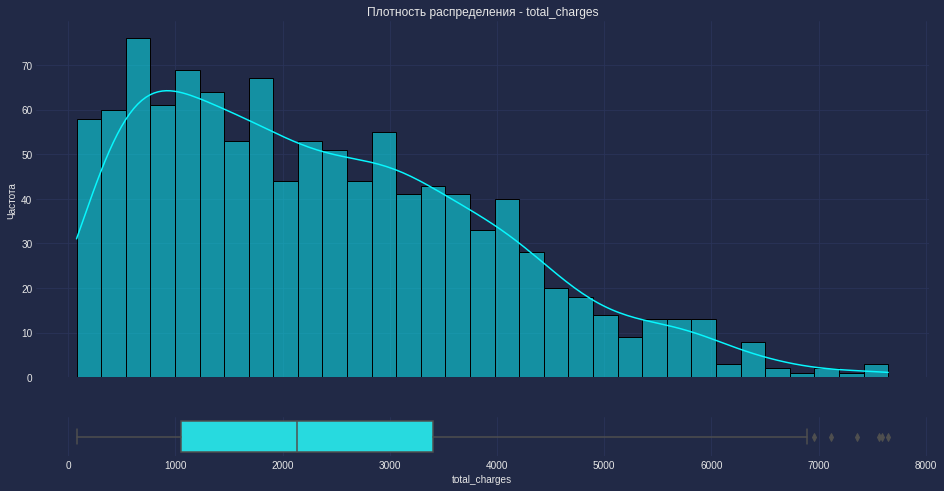

Распределение данных по тесту Шапиро-Уилка параметра 'total_charges' не является нормальным, p-value = 1.0826285647676989e-18


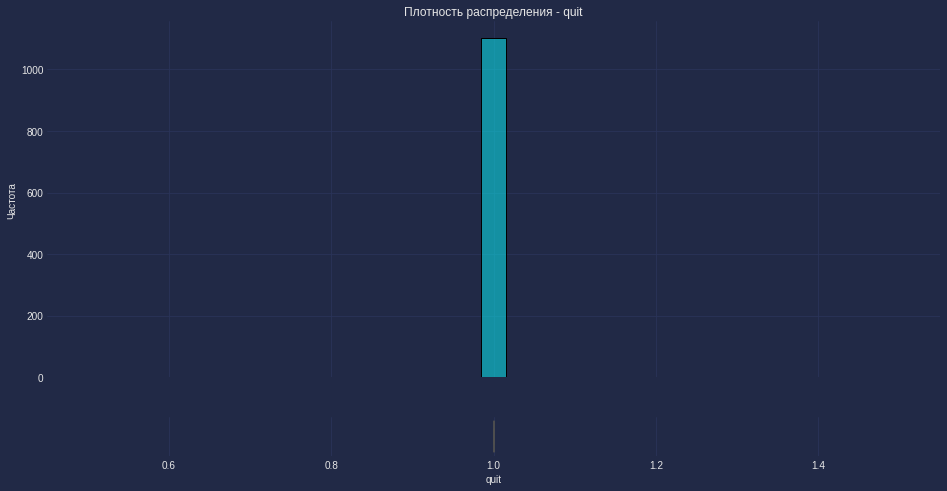

Распределение данных по тесту Шапиро-Уилка параментра 'quit' является нормальным, p-value = 1.0


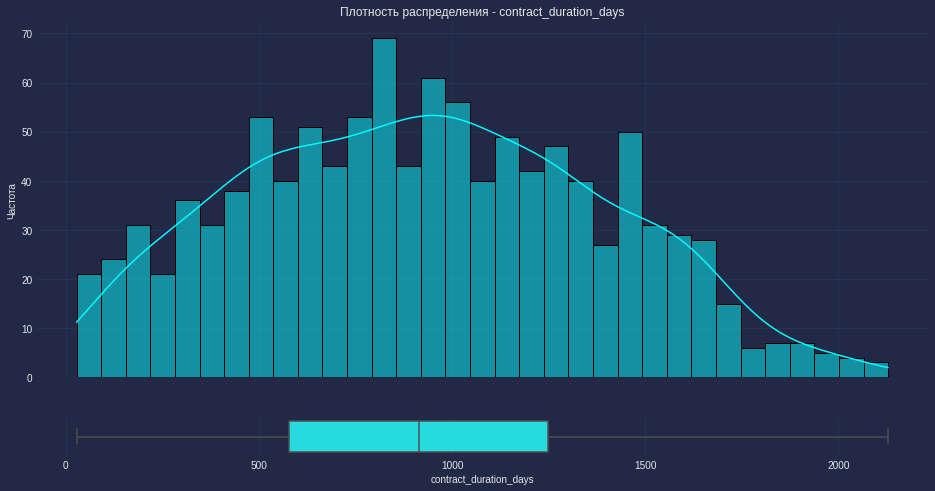

Распределение данных по тесту Шапиро-Уилка параметра 'contract_duration_days' не является нормальным, p-value = 7.419177272538491e-09


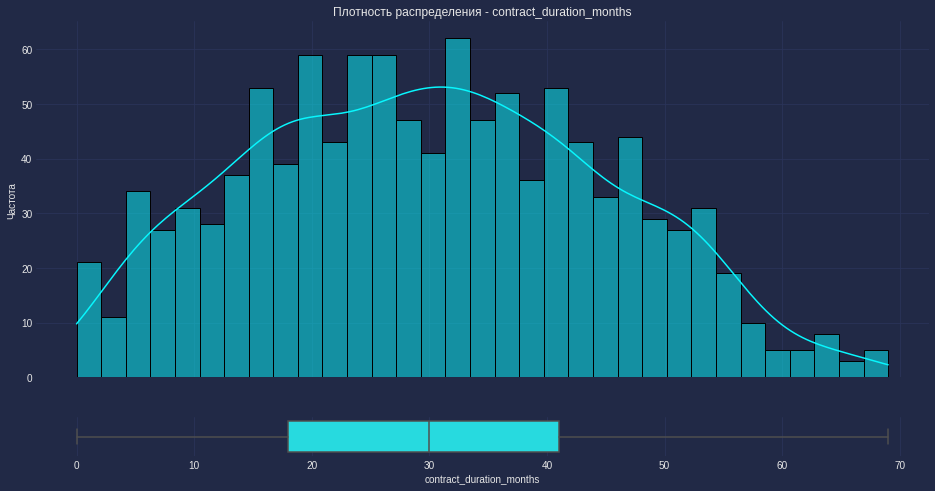

Распределение данных по тесту Шапиро-Уилка параметра 'contract_duration_months' не является нормальным, p-value = 3.95194099667151e-09


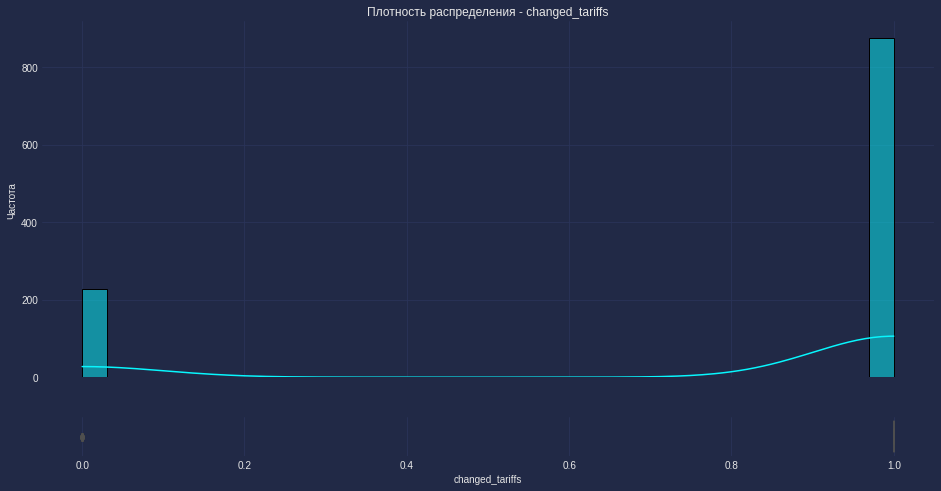

Распределение данных по тесту Шапиро-Уилка параметра 'changed_tariffs' не является нормальным, p-value = 0.0


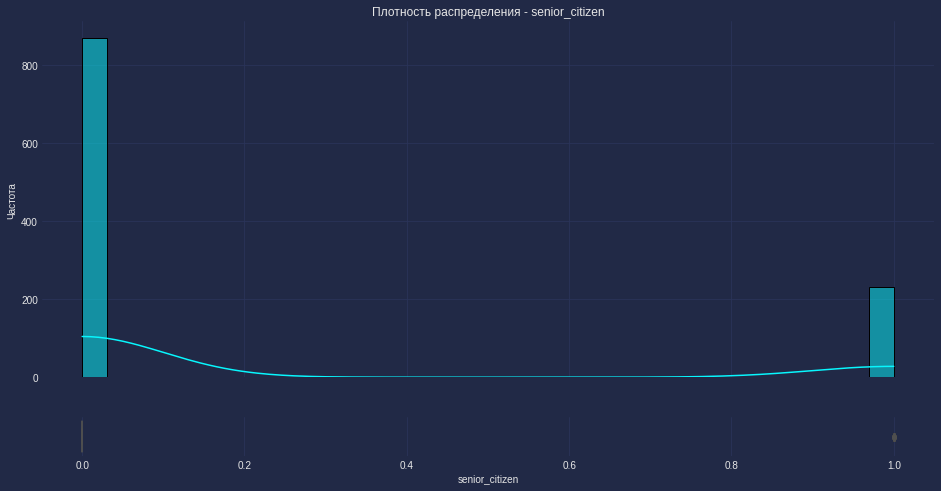

Распределение данных по тесту Шапиро-Уилка параметра 'senior_citizen' не является нормальным, p-value = 0.0


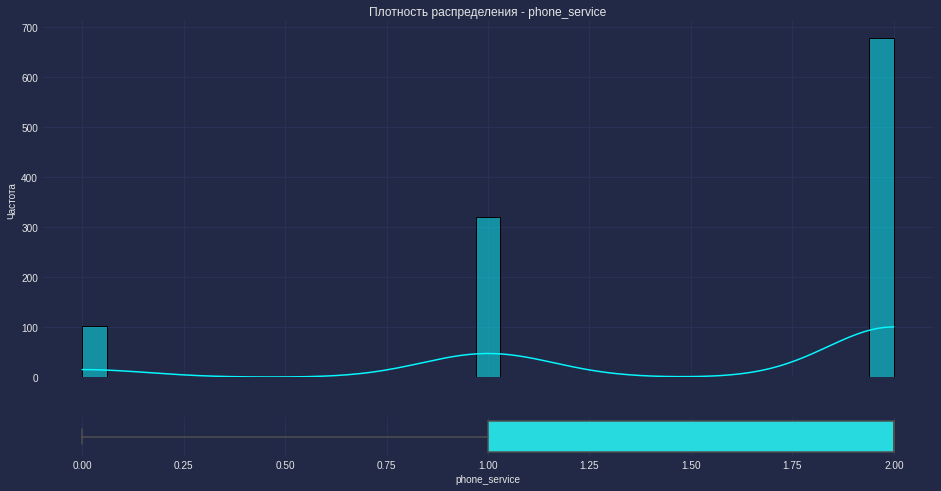

Распределение данных по тесту Шапиро-Уилка параметра 'phone_service' не является нормальным, p-value = 7.828073611257726e-41


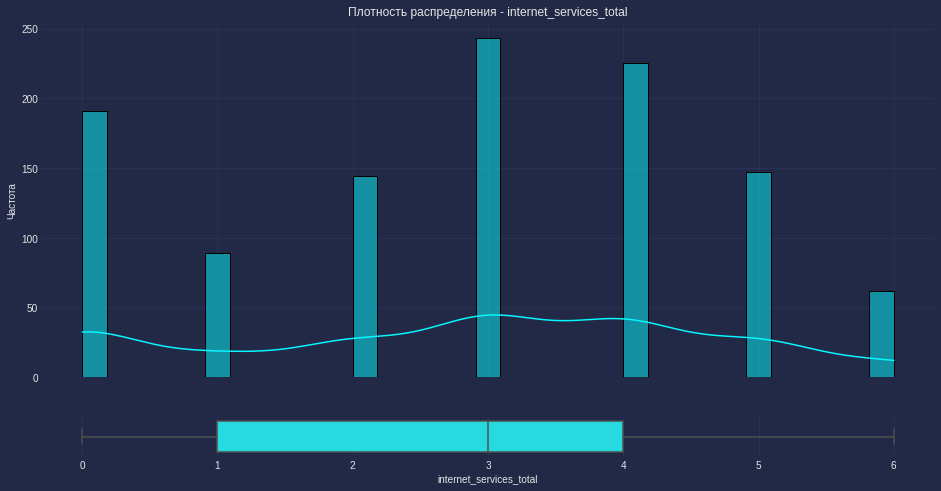

Распределение данных по тесту Шапиро-Уилка параметра 'internet_services_total' не является нормальным, p-value = 4.960410699026915e-23


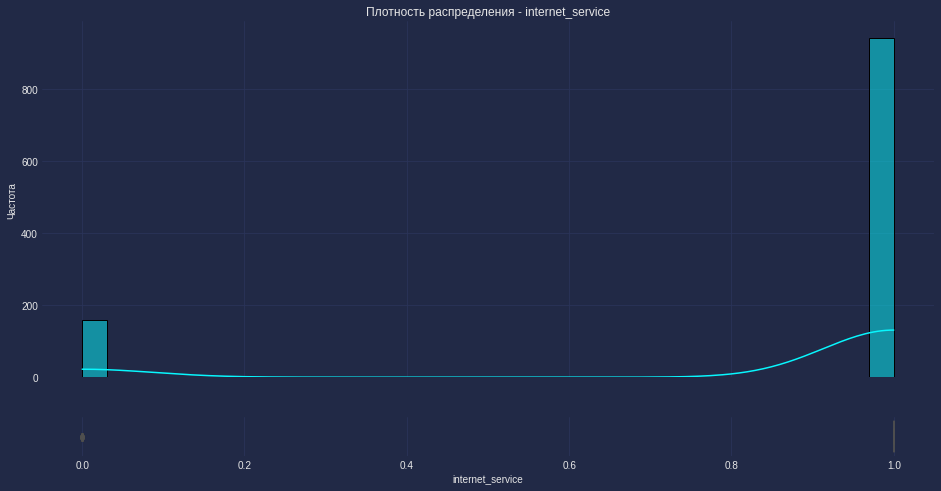

Распределение данных по тесту Шапиро-Уилка параметра 'internet_service' не является нормальным, p-value = 0.0


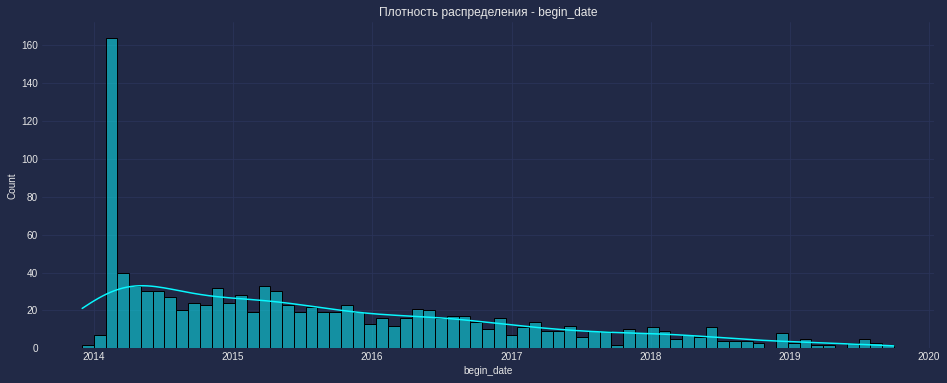

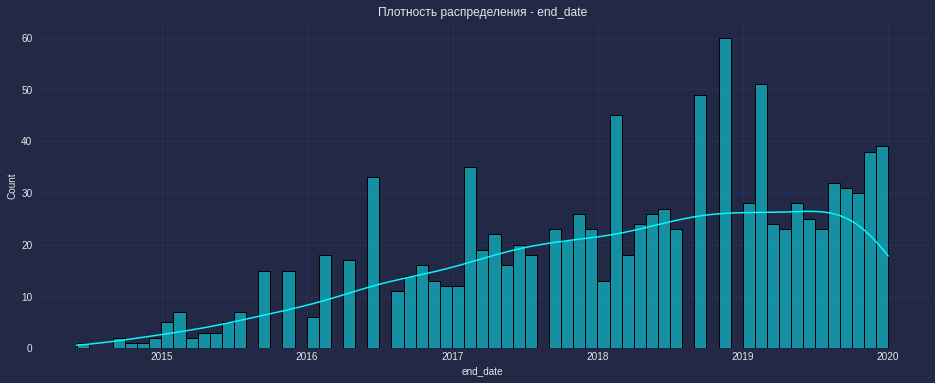

In [51]:
draw_graphs_and_shapiro(df[df['quit']==1].drop(['customer_id'], axis=1), None)

Типичный портрет ушедшего абоонента:
- заключен договор в начале 2014 года.
- медианная длительность контракта - 2.5 года.
- медианное значение месячной оплаты около 85.
- пользуется и интернетом и телефоном.
- способ подключения интернета - оптоволокно.
- пользовался дополнительными интернет-услугами.
- за время действия контракта менял тариф.
- есть супруг / супруга.
- не является пенсионером.

### Удаление лишних признаков

- `customer_id` - ID клиента нужен был исключительно для объединения таблиц, для обучения не потребуется.
- `contract_duration_months` - нужен был как промежуточный столбец для определения признака смены тарифа за время действия контракта. учитывая наличие признака длительности контракта в днях, длительность контракта в месяцах смысла не несет.
- `begin_date`, `end_date` - факторы времени, понадобились для получения целевого признака оттока клиентов и продолжительности пользования. На исторических данных обучение моделей не планируется, столбцы могут сделать данные более объёмными, а также затруднить интерпретацию признаков.
- `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv` и `streaming_movies` - перечень интернет-услуг мы учли в резолютирующем признаке `internet_services_total`.
- `multiple_lines` - этот признак учли в признаке `phone_service`.
- `gender` - признак показал околонулевую корреляцию с остальными признаками, соответственно, он неинформативен. Среди признаков персональных сведений абонентов также удалим `partner`, `dependents`, поскольку наличие детей не означает их совместное проживание с абонентом, поэтому оставим только признак пенсионера.
- `total_charges` - сильно коррелирует со сроком действия контракта. У этих признаков по scatterplot также высокая линейная зависимость.
- `internet_service`, `internet_type`- максимально либо очень сильно коррелируют с `monthly_charges`, это значит, что установить, пользуется абонент интернетом или нет, а также тип подключения, можно исходя из его месячного тарифа, значит дополнительные признаки нам не нужны.
- `paperless_billing`, `payment_method` сведения об оплате также имеют небольшую корреляцию только с `monthly_charges`

In [52]:
# Удаление лишних признаков

df = df.drop(['customer_id', 
              'contract_duration_months', 
              'begin_date', 'end_date', 
              'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
              'multiple_lines', 
              'gender', 'partner', 'dependents',
              'total_charges', 
              'internet_service', 'internet_type',
              'paperless_billing', 'payment_method'], axis=1)

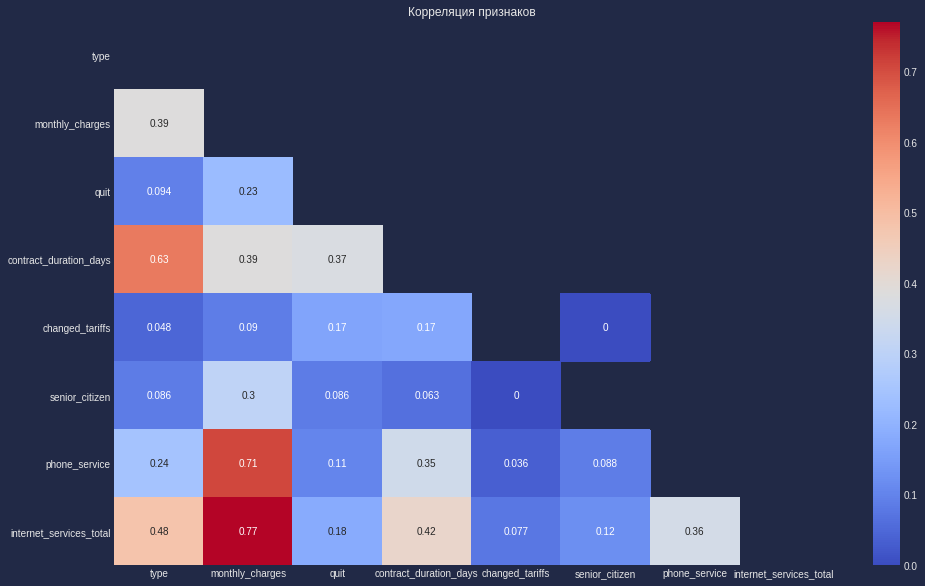

CPU times: user 616 ms, sys: 88.5 ms, total: 705 ms

Wall time: 705 ms


In [53]:
%%time
interval_cols = ['monthly_charges', 'contract_duration_days']

matrix = np.triu(df.phik_matrix(interval_cols = interval_cols));
plt.figure(figsize = (16,10))
sns.heatmap(df.phik_matrix(interval_cols = interval_cols), 
            annot=True, cmap='coolwarm', mask=matrix);
plt.title('Корреляция признаков')
plt.show()

Наблюдаем сильную зависимость между признаком ежемесячных расходов и количеством используемых интернет-услуг, а также услуг телефонии

## Подготовка данных

In [54]:
df.head()

,type,monthly_charges,quit,contract_duration_days,changed_tariffs,senior_citizen,phone_service,internet_services_total
0,month-to-month,29.85,0,31,1,0,0,1
1,one_year,56.95,0,1036,1,0,1,2
2,month-to-month,53.85,0,123,1,0,1,2
3,one_year,42.30,0,1371,1,0,0,3
4,month-to-month,70.70,0,153,0,0,1,0


In [55]:
X_train, X_test, y_train, y_test = split_df(df, 'quit')

In [56]:
num_col_names = df.drop(['quit'], 1).select_dtypes(exclude='object').columns
ohe_col_names = ['type']

ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first'))])
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_col_names),
     ('num', StandardScaler(), num_col_names)
    ],
    remainder ='passthrough'
)

## Обучение моделей машинного обучения

### DecisionTree

In [57]:
pipeline_tree = Pipeline([
    ('preprocessor', data_preprocessor),
    ('decision_tree', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [58]:
param_grid_tree = {
    'decision_tree__max_depth': [3, 5, 7],
    'decision_tree__min_samples_split': [2, 3, 4],
    'decision_tree__min_samples_leaf': [1, 2, 3]
}

In [59]:
run_time_tree, predict_time_tree, \
roc_auc_tree, best_model_tree = predict_roc_auc_and_timing(pipeline_tree, 
                                                           param_grid_tree, 
                                                           X_train, 
                                                           y_train)

### CatBoost

In [60]:
pipeline_catboost = Pipeline([
    ('preprocessor', data_preprocessor),
    ('catboost', CatBoostClassifier(loss_function='Logloss', verbose=10))
])

In [61]:
param_grid_catboost = {
    'catboost__iterations': [50, 100, 150],
    'catboost__depth': [5,10], 
    'catboost__learning_rate': [0.1, 1, 0.01]
}

In [62]:
run_time_catboost, predict_time_catboost, \
roc_auc_catboost, best_model_catboost = predict_roc_auc_and_timing(pipeline_catboost, 
                                                                   param_grid_catboost, 
                                                                   X_train, 
                                                                   y_train)

0:	learn: 0.6879799	total: 46.6ms	remaining: 6.95s

10:	learn: 0.6425942	total: 52.5ms	remaining: 663ms

20:	learn: 0.6040792	total: 57.6ms	remaining: 354ms

30:	learn: 0.5713578	total: 63.7ms	remaining: 244ms

40:	learn: 0.5431256	total: 69.8ms	remaining: 186ms

50:	learn: 0.5197251	total: 75.5ms	remaining: 147ms

60:	learn: 0.4991037	total: 81.5ms	remaining: 119ms

70:	learn: 0.4809334	total: 87.7ms	remaining: 97.6ms

80:	learn: 0.4655673	total: 93.4ms	remaining: 79.6ms

90:	learn: 0.4512350	total: 100ms	remaining: 65ms

100:	learn: 0.4390131	total: 106ms	remaining: 51.6ms

110:	learn: 0.4281526	total: 113ms	remaining: 39.6ms

120:	learn: 0.4189263	total: 119ms	remaining: 28.5ms

130:	learn: 0.4106373	total: 125ms	remaining: 18.2ms

140:	learn: 0.4031390	total: 132ms	remaining: 8.41ms

149:	learn: 0.3971903	total: 137ms	remaining: 0us

0:	learn: 0.6878759	total: 779us	remaining: 116ms

10:	learn: 0.6423387	total: 7.23ms	remaining: 91.4ms

20:	learn: 0.6039569	total: 13.1ms	remaining:

### XGBoost

In [63]:
pipeline_xgboost = Pipeline([
    ('preprocessor', data_preprocessor),
    ('xgboost', XGBClassifier())
])

In [64]:
param_grid_xgboost = {
    #'xgboost__learning_rate': (0.05, 0.10, 0.15),
    'xgboost__max_depth': [3, 4, 5],
    #'xgboost__min_child_weight': [1, 3, 5, 7],
    #'xgboost__gamma': [0.0, 0.1, 0.2],
    #'xgboost__colsample_bytree': [0.3, 0.4]
}

In [65]:
run_time_xgboost, predict_time_xgboost, \
roc_auc_xgboost, best_model_xgboost = predict_roc_auc_and_timing(pipeline_xgboost, 
                                                                 param_grid_xgboost, 
                                                                 X_train, 
                                                                 y_train)

[21:23:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[21:23:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[21:23:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[21:23:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

### Dummy

In [66]:
pipeline_dummy = Pipeline([
    ('preprocessor', data_preprocessor),
    ('dummy', DummyClassifier(random_state=RANDOM_STATE))
])

In [67]:
param_grid_dummy = {
    'dummy__strategy': ['most_frequent',
                        'prior',
                        'stratified',
                        'uniform']}

In [68]:
run_time_dummy, predict_time_dummy, \
roc_auc_dummy, best_model_dummy = predict_roc_auc_and_timing(pipeline_dummy, 
                                                             param_grid_dummy, 
                                                             X_train, 
                                                             y_train)

## Выбор лучшей модели

In [69]:
data = {
    'Модель': ['DecisionTree', 'CatBoost', 'XGBoost', 'Dummy'],
    'Время исполнения': [run_time_tree, run_time_catboost, run_time_xgboost, run_time_dummy],
    'ROC-AUC': [roc_auc_tree, roc_auc_catboost, roc_auc_xgboost, roc_auc_dummy],
    'Время прогноза': [predict_time_tree, predict_time_catboost, predict_time_xgboost, predict_time_dummy],
}

data = pd.DataFrame(data)
data.sort_values(by='ROC-AUC', ascending=False)

,Модель,Время исполнения,ROC-AUC,Время прогноза
1,CatBoost,35.780035,0.904744,0.025503
2,XGBoost,66.524012,0.898588,0.010554
0,DecisionTree,0.972153,0.789137,0.005225
3,Dummy,0.321084,0.500000,0.005042


Лучшее значение ROC-AUC на тренировочной выборке показала модель CatBoost **0.905**.

 
Далее проверим её качество на тестовой выборке.

In [70]:
best_model_catboost.fit(X_train, y_train)
probabilities = best_model_catboost.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
predictions = best_model_catboost.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

0:	learn: 0.3927428	total: 861us	remaining: 128ms

10:	learn: 0.3154532	total: 8.77ms	remaining: 111ms

20:	learn: 0.2844692	total: 16.5ms	remaining: 101ms

30:	learn: 0.2535364	total: 24.2ms	remaining: 93ms

40:	learn: 0.2305575	total: 32ms	remaining: 85ms

50:	learn: 0.2110845	total: 39.7ms	remaining: 77ms

60:	learn: 0.1983093	total: 47.7ms	remaining: 69.7ms

70:	learn: 0.1898094	total: 56.4ms	remaining: 62.7ms

80:	learn: 0.1821998	total: 64.7ms	remaining: 55.1ms

90:	learn: 0.1742337	total: 72.8ms	remaining: 47.2ms

100:	learn: 0.1659346	total: 80.8ms	remaining: 39.2ms

110:	learn: 0.1608865	total: 88.8ms	remaining: 31.2ms

120:	learn: 0.1554470	total: 96.9ms	remaining: 23.2ms

130:	learn: 0.1518305	total: 105ms	remaining: 15.3ms

140:	learn: 0.1474779	total: 113ms	remaining: 7.24ms

149:	learn: 0.1451301	total: 123ms	remaining: 0us


In [71]:
data_catboost = {
    'Модель': ['CatBoost'],
    'ROC-AUC': [roc_auc],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1': [f1]
}

data_catboost = pd.DataFrame(data_catboost)
data_catboost

,Модель,ROC-AUC,Accuracy,Precision,Recall,F1
0,CatBoost,0.928232,0.931857,0.839196,0.654902,0.735683


На тестовой выборке ROC-AUC **0.928**, accuracy (0.932) и precision (0.84)

In [72]:
X_train_new = pipeline_catboost.named_steps['preprocessor'].fit_transform(X_train)
X_test_new = pipeline_catboost.named_steps['preprocessor'].transform(X_test)
explainer = shap.Explainer(best_model_catboost.named_steps['catboost'], X_train_new)
feature_names = pipeline_catboost.named_steps['preprocessor'].get_feature_names_out()
X_test_new = pd.DataFrame(X_test_new, columns = feature_names)
shap_values = explainer(X_test_new)

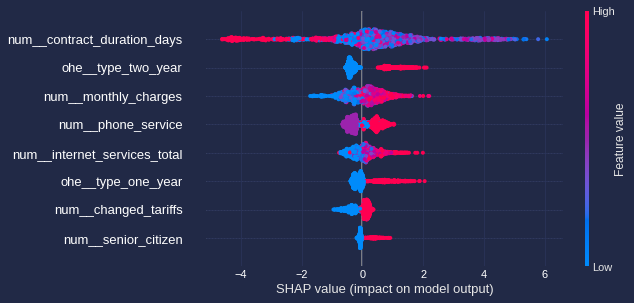

In [73]:
shap.plots.beeswarm(shap_values, axis_color='white')

Наиболее значимые признаки:
- длительность действия контракта,
- наличие типа оплаты раз в 2 года,
- расходы за месяц.

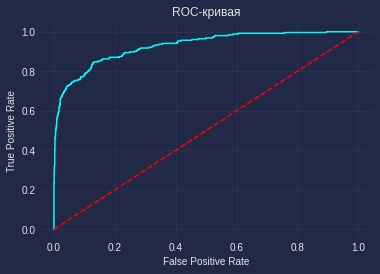

In [74]:
# Построение ROC-кривой

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-кривая')
plt.show()

Text(0.5, 18.5, 'Predicted')

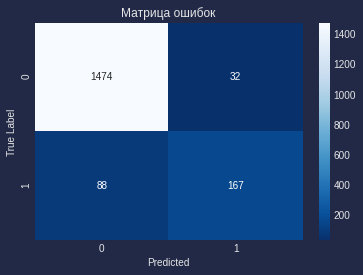

In [75]:
# Построение матрицы ошибок

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('True Label')
plt.xlabel('Predicted')

- True Negative - 1474 - модель правильно предсказала, что эти экземпляры относятся к отрицательному классу.
- False Negative - 32 - модель неверно предсказала, что эти экземпляры относятся к отрицательному классу.
- False Positive - 88 - модель неверно предсказала, что эти экземпляры относятся к положительному классу.
- True Positive - 167 - модель правильно предсказала, что эти экземпляры относятся к положительному классу.

## Общий вывод и рекомендации заказчику

**Выводы:**
- Представлены данные с 1 октября 2013 по 1 февраля 2020.
- Целевой признак был определен на основе пропусков в столбце с датой окончания действия договора `EndDate`.
- Имеется дисбаланс классов целевого признака (84 % оставшихся и 16 % ушедших абонентов).
- Отчетной датой для обновления сведений является именно первое число соответствующего месяца.
- Произведена обработка данных, изменены типы данных.
- Добавлены дополнительные признаки:
    - длительность действия договора на отчетную дату в днях,
    - смена тарифа абонентом за всемя действия контракта.
- Сгруппированы следующие признаки:
    - использование услуг интернета,
    - использование услуг телефонии,
    - количество подключенных интернет-услуг.
- Заполнены все пропуски либо некорректно указанные сведения.
- Типичный портрет ушедшего абоонента:
    - заключен договор в начале 2014 года.
    - медианная длительность контракта - 2.5 года.
    - медианное значение месячной оплаты около 85.
    - пользуется и интернетом и телефоном.
    - способ подключения интернета - оптоволокно.
    - пользовался дополнительными интернет-услугами.
    - за время действия контракта менял тариф.
    - есть супруг / супруга.
    - не является пенсионером.
- Лучшее значение ROC-AUC на тренировочной выборке показала модель CatBoost - 0.905.
- Модель Catboost имеет хорошее время обучения.
- На тестовой выборке модель Catboost показала следующие значения:
    - ROC-AUC - **0.928**.
    - Модель верно классифицирует 93.2% значений (accuracy).
    - 84% предсказанных положительных случаев действительно являются истинными положительными (precision).
    - Модель способна обнаруживать 65.5% положительных случаев из всех истинных положительных (recall).
- Для обучения использовались следующие модели: DecisionTree, CatBoost, XGBoost и Dummy.
- Из объединенного датасета удалены лишние признаки
- Наиболее значимые признаки:
    - длительность действия контракта,
    - наличие типа оплаты раз в 2 года,
    - расходы за месяц.
- Результаты матрицы ошибок:
    - True Negative - 1474 - модель правильно предсказала, что эти экземпляры относятся к отрицательному классу.
    - False Negative - 32 - модель неверно предсказала, что эти экземпляры относятся к отрицательному классу.
    - False Positive - 88 - модель неверно предсказала, что эти экземпляры относятся к положительному классу.
    - True Positive - 167 - модель правильно предсказала, что эти экземпляры относятся к положительному классу.

**Рекомендации заказчику:**
- Для объективной картины не хватает сведений: 
    - об оценке технического состояния интернет соединения,
    - о наличии частых разрывов соединений у конкретных абонентов,
    - об оценка тарифов у конкурентов.
- Постепенный отход от DSL соединений и переход на оптоволоконное соединение, имеющее более стабильное и высокоскоростное соединение.
- Создание тарифных планов с прогрессирующим дисконтом при пользовании услугами "пакетами" (наборами).
- Более тщательная работа с потенциально уходящими клиентами (выявление причин ухода и нахождение компромиссного решения для продолжения сотрудничества).
- Работа с лояльными клиентами, предоставление скидок за длительность пользования услуг.